In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import pandas as pd
import networkx as nx
import scipy
import re
import pathpy as pp
from glob import glob
#import nxviz
#from nxviz.plots_cust import CircosPlot, MatrixPlot, ArcPlot, BasePlot
sub_path  ='X:\\4 e-Lab\\' # y:\\eLab

# Importing libraries 
import statsmodels.api as sm 
from statsmodels.formula.api import ols 
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import pandas as pd

import sys

sys.path.append('T:\EL_experiment\Codes\CCEP_human\Python_Analysis/py_functions')
import basic_func as bf
import load_summary as ls
sys.path.append('T:\\EL_experiment\Codes\CCEP_human\Python_Analysis\py_functions')
sys.path.append('X:\\4 e-Lab\e-Lab shared code\Softwares\Connectogram')
sys.path.append('T:\\EL_experiment\Codes\\UBELIX_EvM\\NMF\\functions')
path_connectogram = 'X:\\4 e-Lab\e-Lab shared code\Softwares\Connectogram'
from main_script import ConnectogramPlotter

cwd = os.getcwd()

##all
cond_vals = np.arange(4)
cond_labels = ['BM', 'BL', 'Fuma', 'Benzo']
cond_colors = ['#494159', '#594157', "#F1BF98", "#8FB996"]
dist_groups = np.array([[0, 15], [15, 30], [30, 5000]])
dist_labels = ['local (<15 mm)', 'short (<30mm)', 'long']
sub_path = 'X:\\4 e-Lab\\'  # y:\\eLab
group_labels = ['local direct', 'long direct', 'indirect']

##
# only sleep subjs
subjs = ["EL010", "EL011", "EL014", "EL015", "EL016", "EL017", "EL019", "EL020", "EL021",
         "EL022", "EL025", "EL026", "EL027"]
data_con_file = sub_path+'\EvM\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\Sleep\connectogram\\data_con_stat.csv'


In [2]:
folder = 'BrainMapping'
cond_folder = 'CR'  # Condition = 'Hour', 'Condition', 'Ph'
Fs = 500
dur = np.zeros((1, 2), dtype=np.int32)
t0 = 1
dur[0, 0] = -t0
dur[0, 1] = 3

#dur[0,:]       = np.int32(np.sum(abs(dur)))
x_ax = np.arange(dur[0, 0], dur[0, 1], (1 / Fs))
color_d, color_dist, color_group, color_elab = ls.get_color()

In [3]:
cwp = os.getcwd()

In [4]:
stop

NameError: name 'stop' is not defined

In [116]:
CIRC_AREAS_FILEPATH = 'X:\\4 e-Lab\e-Lab shared code\Softwares\Connectogram\circ_areas.xlsx'
tab_region = pd.read_excel(CIRC_AREAS_FILEPATH, sheet_name='plot')
tab_region = tab_region.sort_values('Order').reset_index(drop=True)
regions_all = tab_region.Area.values
region_col = tab_region.color.values

CIRC_AREAS_FILEPATH = 'X:\\4 e-Lab\e-Lab shared code\Softwares\Connectogram\circ_areas.xlsx'
all_region = pd.read_excel(CIRC_AREAS_FILEPATH, sheet_name='atlas')

In [117]:
regions_all

array(['Dorsofrontal', 'Orbitofrontal', 'Insula', 'Basotemporal',
       'Hippocampus', 'Amygdala', 'Laterotemporal', 'Cingular',
       'Parietal', 'Occipital'], dtype=object)

## Examples

## 1.Node

In [129]:
node_all_dfs = []  # A list to hold DataFrames

for subj in subjs:
    print(subj)
    path_patient_analysis = os.path.join(sub_path, 'EvM', 'Projects', 'EL_experiment', 'Analysis', 'Patients', subj)
    exp_dir = os.path.join(path_patient_analysis, 'BrainMapping', 'CR', 'Graph', 'Node')
    file = os.path.join(exp_dir, 'node_features_sleep.csv')
    
    if os.path.isfile(file):
        df = pd.read_csv(file)
        node_all_dfs.append(df)  # Add DataFrame to the list

# Concatenate all DataFrames in the list
node_all = pd.concat(node_all_dfs, ignore_index=True)
node_all = node_all[np.isin(node_all.ChanR, regions_all)].reset_index(drop=True)
node_all.insert(0,'Node_ID',node_all.groupby(['Subj', 'Chan']).ngroup())

EL010
EL011
EL014
EL015
EL016
EL017
EL019
EL020
EL021
EL022
EL025
EL026
EL027


In [130]:
# Calculate the maximum "Cb" value for each subject
#node_all['Max_Cc'] = node_all.groupby('Subj')['Cc'].transform('max')

# Normalize the "Cb" values by dividing by the maximum "Cb" value for the corresponding subject
#node_all['Normalized_Cc'] = node_all['Cc'] / node_all['Max_Cc']

node_all['Normalized_Cc'] = (node_all['Cc'] -node_all.groupby('Subj')['Cc'].transform('mean')) / node_all.groupby('Subj')['Cc'].transform('std')
node_all['Normalized_Cb'] = (node_all['Cb'] -node_all.groupby('Subj')['Cb'].transform('mean')) / node_all.groupby('Subj')['Cb'].transform('std')


In [131]:
node_all['Normalized_Cc'] = (node_all['Cc'] /node_all.groupby('Subj')['Cc'].transform('median')) # / node_all.groupby('Subj')['Cc'].transform('std')
node_all['Normalized_Cb'] = (node_all['Cb'] /node_all.groupby('Subj')['Cb'].transform('median')) # / node_all.groupby('Subj')['Cb'].transform('std')


In [132]:
# Performing two-way ANOVA 
model = ols('Normalized_' + feature_selected+' ~ C(ChanR) + C(SleepState) + C(ChanR):C(SleepState)',data=df[df.SleepState != 'Wake']).fit() 
result = sm.stats.anova_lm(model, type=2) 
  
# Print the result 
print(result) 

NameError: name 'feature_selected' is not defined

In [134]:
df = node_all.copy()

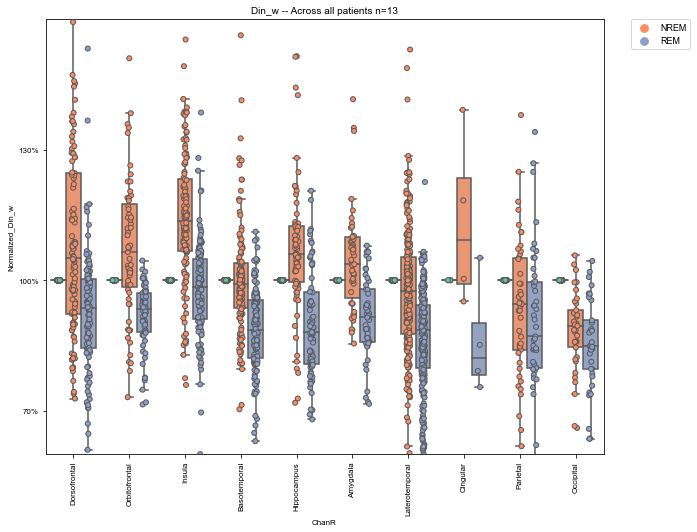

In [138]:

feature_selected = 'Din_w'
# Extract metric values during 'Wake' state
wake_values = df[df['SleepState'] == 'Wake'].set_index('Node_ID').to_dict()

# Normalize 'Dout' metric for plotting
df['Normalized_' + feature_selected] = df.apply(lambda row: row[feature_selected] / wake_values[feature_selected][row['Node_ID']] if wake_values[feature_selected][row['Node_ID']] != 0 else 2 if row[feature_selected] !=0 else np.nan , axis=1)


plt.figure(figsize=(10,8))
sns.stripplot(x='ChanR', y='Normalized_' + feature_selected, hue = 'SleepState', data=df, jitter=True, palette="Set2", dodge=True, linewidth=1, edgecolor='gray', order = regions_all)

# Get the ax object to use later.
ax = sns.boxplot(x='ChanR', y='Normalized_' + feature_selected, hue = 'SleepState', data=df, palette="Set2", fliersize=0, order = regions_all)

# Get the handles and labels. For this example it'll be 2 tuples
# of length 4 each.
handles, labels = ax.get_legend_handles_labels()

# When creating the legend, only use the first two elements
# to effectively remove the last two.
l = plt.legend(handles[1:3], labels[1:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim([0.6, 1.6])
plt.yticks([0.7, 1, 1.3],['70%', '100%', '130%'])
plt.xticks(rotation=90)
plt.title(feature_selected+ ' -- Across all patients n='+str(len(np.unique(df.Subj))))
path_save = 'X:\\4 e-Lab\EvM\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\Sleep\degree\\'+feature_selected+'.svg'
plt.savefig(path_save)
plt.show()

In [79]:

import matplotlib as mpl
cmap = mpl.cm.seismic
for ss in ['NREM', 'REM']:
    for feature_selected in ['Dout_w', 'Din_w']:
        for area in regions_all:
            values_plot = df.loc[(df.SleepState == ss)&(df.ChanR == area), 'Normalized_' + feature_selected].values
            fig=plt.figure(figsize=(0.5,3))
            plt.title('Normalized_'+feature_selected+' Across Nodes in '+area)
            ax=fig.add_subplot(111)
            ax.axis([0,1,0.6,1.666])
            norm = mpl.colors.Normalize(vmin=0.6, vmax=1.6)
            cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                            orientation='vertical',
                                            ticks=[0.7,1,1.3], norm=norm,
                                            )
            ax.axhline(np.percentile(values_plot, 25), color = 'k', ls = '--')
            ax.axhline(np.percentile(values_plot, 75), color = 'k', ls = '--')
            ax.axhline(np.nanmedian(values_plot), color = 'k', ls = '-')
            ax.axhspan(np.percentile(values_plot, 25), np.percentile(values_plot, 75), facecolor='papayawhip', alpha = 0.5)
            path_save ='X:\\4 e-Lab\\EvM\\Projects\\EL_experiment\\Analysis\\Patients\\Across\\BrainMapping\\Sleep\\degree\\'+feature_selected+'_bar_'+area+'_'+ss+'.svg'
            plt.savefig(path_save)
            plt.close()

## P and DI

In [122]:
node_all_dfs = []  # A list to hold DataFrames

for subj in subjs:
    path_patient_analysis = os.path.join(sub_path, 'EvM', 'Projects', 'EL_experiment', 'Analysis', 'Patients', subj)
    exp_dir = os.path.join(path_patient_analysis, 'BrainMapping', 'CR', 'data')
    summary_gen_path = path_patient_analysis + '\\' + folder + '\\' + cond_folder + '\\data\\summ_general.csv'  # summary_general

    con_summary = pd.read_csv(summary_gen_path)
    con_summary = con_summary[(con_summary.Sig > 0)].reset_index(drop=True)
            
    for ss in ['Wake', 'NREM', 'REM']:
        file = os.path.join(exp_dir, 'summ_' + ss + '.csv')

        if os.path.isfile(file):
            df = pd.read_csv(file)
            df = df.merge(con_summary[['Stim', 'Chan', 'delay']], on = ['Stim', 'Chan'], how ='right').reset_index(drop=True)
            node_all_dfs.append(df)  # Add DataFrame to the list
    # Concatenate all DataFrames in the list
con_all = pd.concat(node_all_dfs, ignore_index=True)


In [123]:
con_all.insert(6, 'Group', 'local')
con_all.loc[(con_all.d>20)&(con_all.delay>0.02), 'Group'] = 'indirect'
con_all.loc[(con_all.d>20)&(con_all.delay<=0.02), 'Group'] = 'direct'
con_all.loc[(con_all.Sig==0), 'Group'] = 'None'

In [124]:
con_all['DI_abs'] = abs(con_all.DI)

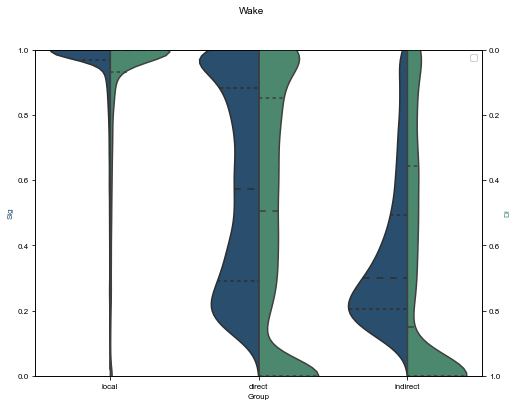

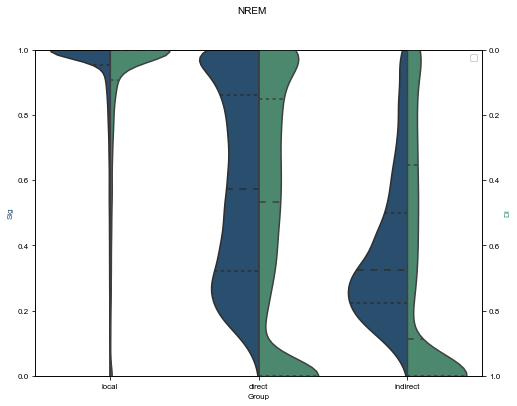

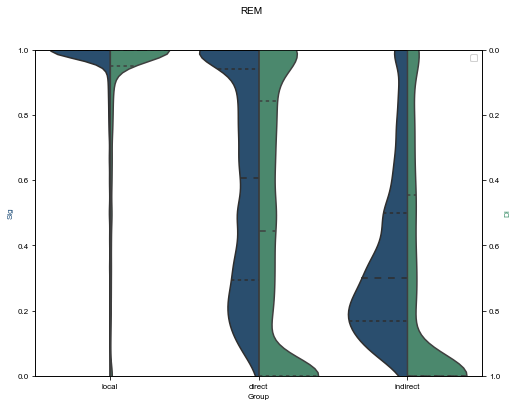

In [57]:
for ss in ['Wake', 'NREM', 'REM']:
    df = con_all[(con_all.SleepState == ss)&(con_all.Group != 'None')].reset_index(drop=True)
    # Create a figure with two y-axes
    fig, ax1 = plt.subplots(figsize=(8, 6))
    plt.suptitle(ss)
    ax2 = ax1.twinx()
    c_P = color_elab[0]
    c_DI = color_elab[2]

    sns.violinplot(x='Group', y = 'Sig', data = df, hue=True,
        hue_order=[True, False], split=True, ax=ax1, inner="quart", palette=[c_P, 'white'], legend=False)
    sns.violinplot(x='Group', y = 'DI_abs', data = df, hue=True,
        hue_order=[False, True], split=True, ax=ax2, inner="quart", color=c_DI, legend=False)
    ax2.invert_yaxis()
    ax1.legend([])
    ax2.legend([])
    # Set y-axis labels and titles
    ax1.set_ylabel("Sig", color=c_P)
    ax2.set_ylabel("DI", color=c_DI)
    ax1.set_ylim([0,1])
    ax2.set_ylim([1,0])
    ccc
    plt.show()

## 2. Connections

In [139]:
node_all_dfs = []  # A list to hold DataFrames

for subj in subjs:
    path_patient_analysis = os.path.join(sub_path, 'EvM', 'Projects', 'EL_experiment', 'Analysis', 'Patients', subj)
    exp_dir = os.path.join(path_patient_analysis, 'BrainMapping', 'CR', 'Graph', 'Connection')
    file = os.path.join(exp_dir, 'con_sleep_stats_LL.csv')
    
    if os.path.isfile(file):
        df = pd.read_csv(file)
        summary_gen_path = path_patient_analysis + '\\' + folder + '\\' + cond_folder + '\\data\\summ_general.csv'  # summary_general
    
        con_summary = pd.read_csv(summary_gen_path)
        con_summary = con_summary[(con_summary.Sig > 0)].reset_index(drop=True)
        df = df.merge(con_summary[['Stim', 'Chan', 'd', 'delay']], on = ['Stim', 'Chan'], how ='right').reset_index(drop=True)
        node_all_dfs.append(df)  # Add DataFrame to the list
# Concatenate all DataFrames in the list
con_all = pd.concat(node_all_dfs, ignore_index=True)


In [59]:
from matplotlib.lines import Line2Da

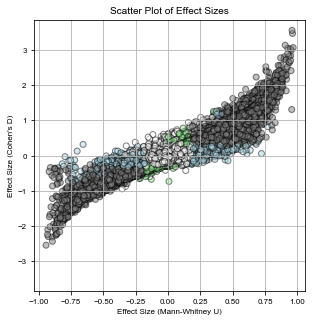

In [141]:
df = con_all[(con_all.p_C>0)&(con_all.p_MW >0)&(con_all.SleepState =='NREM')].reset_index(drop=True)
p = 0.01
# Define colors based on conditions
svg = 0
colors = []
for _, row in df.iterrows():
    if row['p_MW'] <= p and row['p_C'] <= p:
        colors.append('gray')
    elif row['p_MW'] > p and row['p_C'] > p:
        colors.append('white')
    elif row['p_MW'] <= p:
        colors.append('lightblue')
    else: #  row['p_C'] <= p:
        colors.append('lightgreen')

# Create the scatter plot
fig = plt.figure(figsize=(6, 5))  # Set the figure size
if svg:
    plt.scatter(0,0, edgecolor='black', alpha=0.5)
else:
    plt.scatter(df['effect_size'], df['effect_size_C'], c=colors, edgecolor='black', alpha=0.5)
plt.xlabel('Effect Size (Mann-Whitney U)')
plt.ylabel("Effect Size (Cohen's D)")
plt.title('Scatter Plot of Effect Sizes')

# Create custom legend elements and labels
legend_elements = [
    Line2D([0], [0], marker='o', color='black', markerfacecolor='gray', markersize=10, label='< ' + str(p)),
    Line2D([0], [0], marker='o', color='black', markerfacecolor='white', markersize=10, label='> ' + str(p)),
    Line2D([0], [0], marker='o', color='black', markerfacecolor='lightblue', markersize=10, label='p_MW < ' + str(p)),
    Line2D([0], [0], marker='o', color='black', markerfacecolor='lightgreen', markersize=10, label='p_C < ' + str(p)),
]

# get y-axis limits of the plot
low, high = plt.ylim()
# find the new limits
bound = max(abs(low), abs(high))
# set new limits
plt.ylim(-bound, bound)
# Add the legend
if svg:
    plt.legend(handles=legend_elements, loc='upper left')

# Set equal aspect ratio to make the plot a square
# plt.axis('equal')
ax = plt.gca()
ax.set_box_aspect(1)
if svg:
    path_save ='X:\\4 e-Lab\\EvM\\Projects\\EL_experiment\\Analysis\\Patients\\Across\\BrainMapping\\Sleep\\connection\\MWU_CD_01.svg'
else:
    path_save ='X:\\4 e-Lab\\EvM\\Projects\\EL_experiment\\Analysis\\Patients\\Across\\BrainMapping\\Sleep\\connection\\MWU_CD_01.jpg'
# plt.savefig(path_save, dpi = 300)
plt.grid(True)
plt.show()

In [143]:
con_all.insert(4, 'Sig', con_all.p_MW<=0.01)

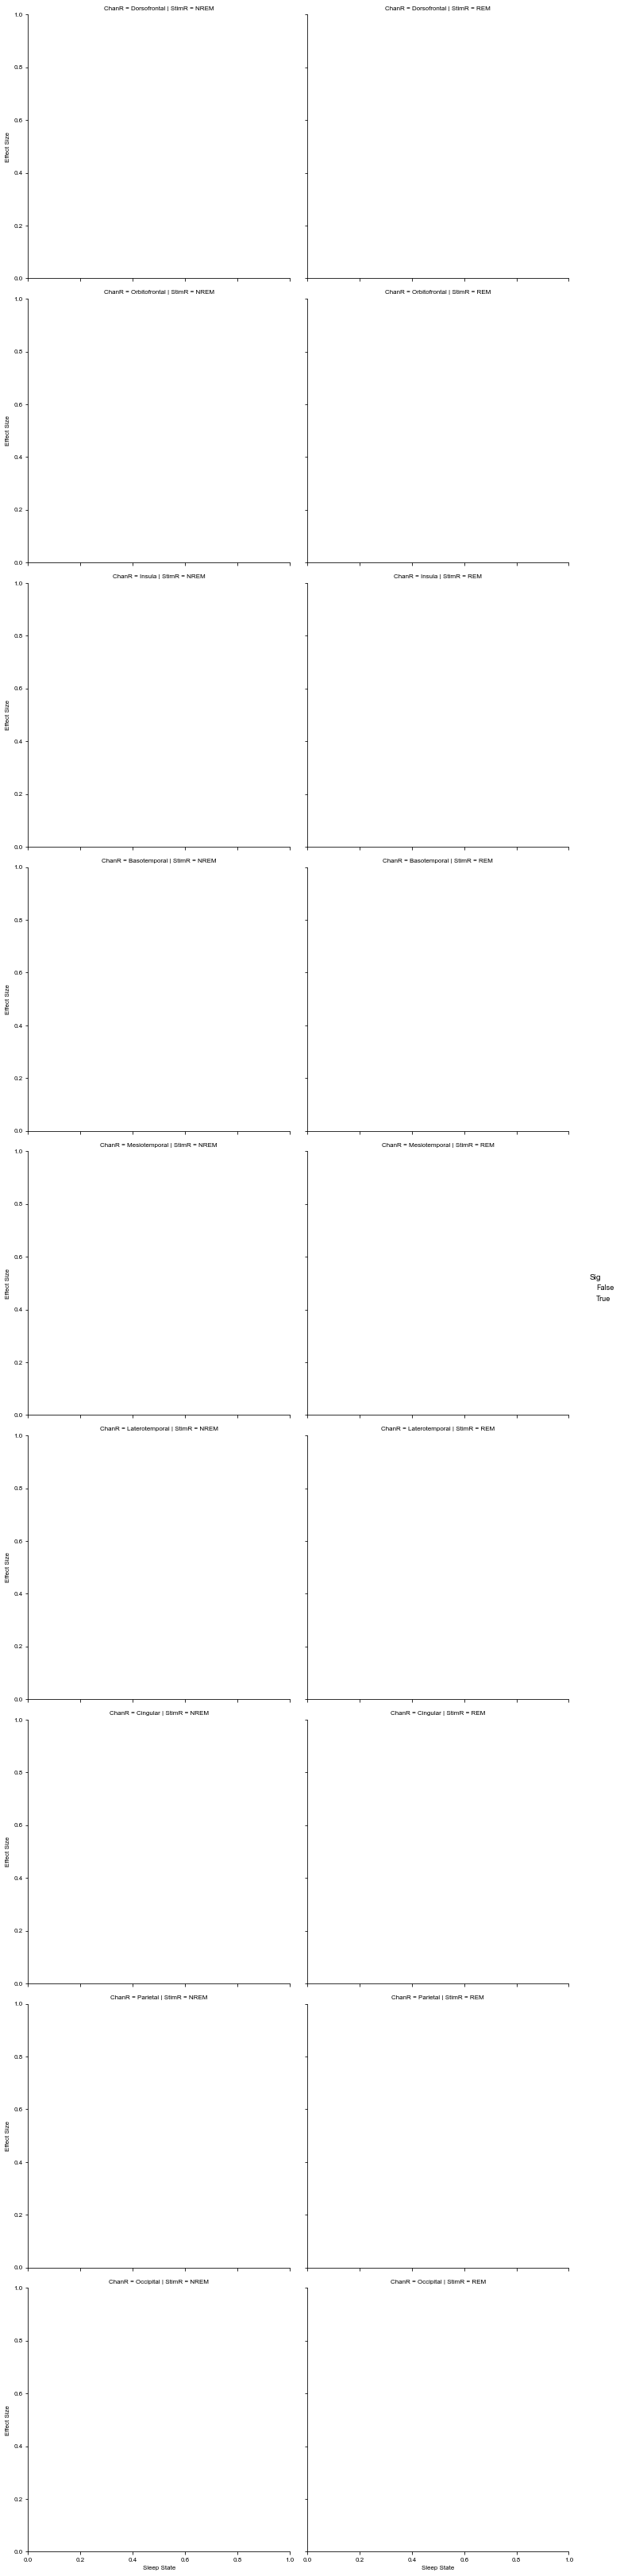

In [127]:
# Create a custom color palette for the plot
custom_palette = {1: 'black', 0: 'white'}  # Black for Sig == 1, White for Sig == 0

# Create the catplot with custom settings
g = sns.catplot(
    x='SleepState',
    y='effect_size',
    hue='Sig',
    col='StimR',
    row='ChanR',
    data=con_all,
    palette=custom_palette,  # Use the defined color palette
    hue_kws={'marker': 'o', 'markeredgecolor': 'black', 'markersize': 5},  # Customize marker properties
    row_order=order,  # Use the defined order for rows
    col_order=x_order,  # Use the defined order for columns
)

# Additional customization if needed
g.set_axis_labels('Sleep State', 'Effect Size')

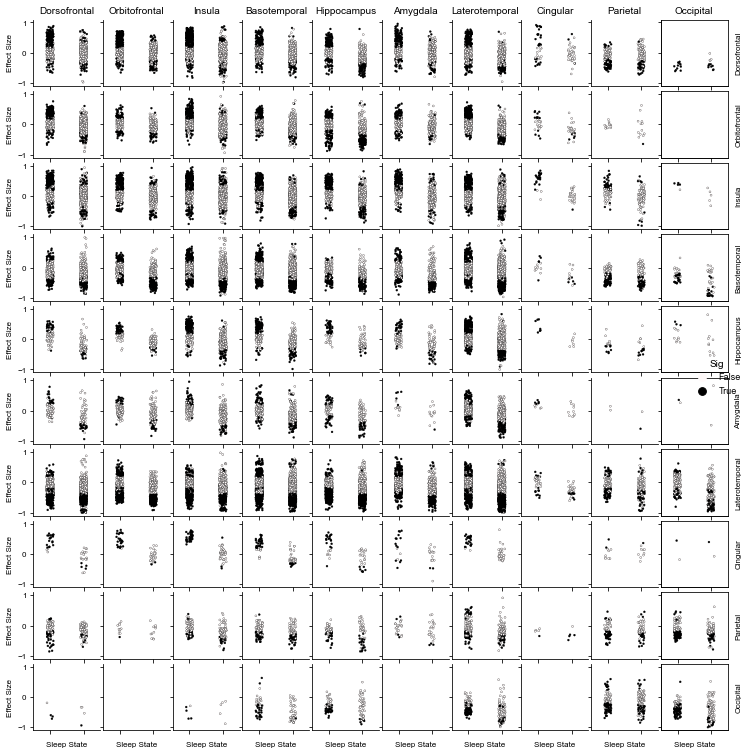

In [144]:
# Define the desired order for rows and columns
order = regions_all  # Used for row and column order
x_order = ['NREM', 'REM']

# Set the color palette for Sig values (1 as black, 0 as white with a black edge)
custom_palette = {1: 'black', 0: 'snow'}  # Black for Sig == 1, White for Sig == 0

# Create the catplot with custom settings
g = sns.catplot(
    x='SleepState',
    y='effect_size',
    hue='Sig',
    col='StimR',
    row='ChanR',
    data=con_all[con_all.d>20],
    palette=custom_palette,  # Use the defined color palette
    row_order=order,  # Use the defined order for rows
    col_order=order, 
    order = x_order, s=2, edgecolor='black', linewidth=0.25,  # Customize marker properties
)

# Remove x-axis tick labels for all rows except the last one
for ax in g.axes[:-1, :].flatten():
    ax.set_xticklabels([])

    
# Remove small titles of each subplot
g.set_titles('')

# Customize x-axis labels for the first column
for ax, x_label in zip(g.axes[0, :], order):
    ax.set_title(x_label)

# Customize y-axis labels for the first row
for ax, y_label in zip(g.axes[:,-1], order):
    # ax.set_ylabel(y_label)
    axes2 = ax.twinx()   # mirror them
    axes2.set_ylabel(y_label)
    axes2.set_yticks([])
# Additional customization if needed
g.set_axis_labels('Sleep State', 'Effect Size')
# Set the figure size to 9x9 inches and the background color to white
g.fig.set_size_inches(10,10)
g.fig.patch.set_facecolor('xkcd:white')

path_save ='X:\\4 e-Lab\\EvM\\Projects\\EL_experiment\\Analysis\\Patients\\Across\\BrainMapping\\Sleep\\connection\\All_swarm.svg'
#plt.savefig(path_save)
# Show the plot
plt.show()


In [59]:
features = ['effect_size', 'p_MW', 'p_perm', 'd','delay'] # ['DI', 'd', 'delay']

data_mean = con_all.groupby(['Subj', 'SleepState', 'ChanSR', 'StimSR','StimR', 'ChanR'], as_index=False)[features].mean()
data_mean.insert(1,'Chan',data_mean.groupby(['Subj', 'ChanSR']).ngroup())
for c in np.unique(data_mean.Chan):
    area = data_mean.loc[data_mean.Chan == c, 'ChanSR'].values[0]
    data_mean.loc[data_mean.StimSR == area, 'Stim'] = int(c)
data_mean.Stim = data_mean.Stim.astype('int')

In [63]:
data_plot_all = data_mean[(data_mean.SleepState == ss)&(data_mean.d > 20)].reset_index(drop=True)
data_plot_all = data_plot_all.rename(columns={"ChanSR": "ChanA", "StimSR": "StimA"}, errors="raise")
data_plot_all['show'] = np.ones((len(data_plot_all,)))
data_plot_all['lw'] = data_plot_all['effect_size']

In [61]:
data_plot_all = con_all[(con_all.SleepState == 'NREM')&(con_all.d > 20)].reset_index(drop=True)
data_plot_all = data_plot_all.drop(columns = ['StimA', 'ChanA'])
data_plot_all = data_plot_all.rename(columns={"ChanSR": "ChanA", "StimSR": "StimA"}, errors="raise")
data_plot_all['show'] = np.ones((len(data_plot_all,)))
data_plot_all['lw'] = abs(data_plot_all['effect_size'])

## Stats

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import statsmodels

In [ ]:
import statsmodels.api as sm 
from statsmodels.regression.mixed_linear_model import MixedLM

In [ ]:
df = data_plot_all[(data_plot_all.SleepState == 'NREM')].reset_index(drop=True)
df = df[['Subj', 'effect_size', 'p_MW', 'StimR', 'ChanR', 'd', 'delay']]
df['condition_effect'] = 0
# df.loc[(df.p_MW<0.05)&(df.effect_size<0), 'condition_effect'] =-1
# df.loc[(df.p_MW<0.05)&(df.effect_size>0), 'condition_effect'] = 1
df.loc[(df.p_MW<0.05), 'condition_effect'] = df.loc[(df.p_MW<0.05), 'effect_size']
df['intercept'] = 1
indep_var = ['intercept', 'StimR', 'ChanR', 'd', 'delay']
# Convert categorical variables 'A' and 'B' to numerical codes for simplicity
df['Subj'] = df['Subj'].astype('category').cat.codes
df['StimR'] = df['StimR'].astype('category').cat.codes
df['ChanR'] = df['ChanR'].astype('category').cat.codes
#df = pd.get_dummies(df, columns=['StimR', 'ChanR'])
df = df.drop(['p_MW', 'effect_size'], axis=1)
# Fit a linear mixed-effects model
model = MixedLM(df['condition_effect'], df[indep_var], groups = df['Subj'])
#model = MixedLM("condition_effect ~ StimR + ChanR + d + delay", df, groups=df["Subj"])
result = model.fit()

# Print the summary
print(result.summary())

In [ ]:
df = data_plot_all[(data_plot_all.SleepState == 'NREM')].reset_index(drop=True)
df = df[['Subj', 'effect_size', 'p_MW', 'StimR', 'ChanR', 'd', 'delay']]
df['condition_effect'] = 0
df.loc[(df.p_MW<0.05)&(df.effect_size<0), 'condition_effect'] =-1
df.loc[(df.p_MW<0.05)&(df.effect_size>0), 'condition_effect'] = 1

# Convert categorical variables to dummies
df = pd.get_dummies(df, columns=["Subj", "StimR", "ChanR"], drop_first=True)

X = df.drop(['condition_effect', 'p_MW', 'effect_size'], axis=1)
y = df['condition_effect']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Feature importance
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': clf.feature_importances_
}).sort_values(by='importance', ascending=False)
print(feature_importances)

## Connectogram

In [68]:
for ss in ['NREM', 'REM']:
    data_plot_all = con_all[(con_all.SleepState == ss)&(con_all.d > 20)].reset_index(drop=True)
    data_plot_all = data_plot_all.drop(columns = ['StimA', 'ChanA'])
    data_plot_all = data_plot_all.rename(columns={"ChanSR": "ChanA", "StimSR": "StimA"}, errors="raise")
    data_plot_all['show'] = np.ones((len(data_plot_all,)))
    data_plot_all['lw'] = abs(data_plot_all['effect_size'])
    for area in np.unique(data_mean.StimR):
        for dir_label, R in zip(['incoming', 'outgoing'],['ChanR', 'StimR']):
            data_plot_all['show'] = np.zeros((len(data_plot_all,)))
            data_plot_all['effect'] = np.zeros((len(data_plot_all,)))
            data_plot_all.loc[(data_plot_all.p_MW <0.01)&(np.isin(data_plot_all[R], area)), 'show'] =1
            data_plot_all.loc[(data_plot_all.effect_size>0), 'effect'] = 1
            data_plot_all.loc[(data_plot_all.effect_size<0), 'effect'] = -1

            data_plot_all['sort'] = 0
            data_plot_all.loc[(np.isin(data_plot_all.ChanR, area)), 'sort'] =1
            data_plot_all = data_plot_all.sort_values(by=['sort']).reset_index(drop=True)
            if np.sum(data_plot_all.show)>0:
                print(np.sum(data_plot_all.show))
                path_save ='X:\\4 e-Lab\\EvM\\Projects\\EL_experiment\\Analysis\\Patients\\Across\\BrainMapping\\Sleep\\connection\\'+ss+'_effect_'+area+'_'+dir_label+'.svg'
                plotter = ConnectogramPlotter()
                os.chdir(path_connectogram)
                plotter.load_data(data_plot_all, path_save)
                plotter.show_plot(area +' -- '+dir_label+' Connections (B-R)', 'effect')
                plt.close()
                os.chdir(cwp)

781.0


<Figure size 1440x1440 with 0 Axes>

962.0


<Figure size 1440x1440 with 0 Axes>

107.0


<Figure size 1440x1440 with 0 Axes>

66.0


<Figure size 1440x1440 with 0 Axes>

1075.0


<Figure size 1440x1440 with 0 Axes>

852.0


<Figure size 1440x1440 with 0 Axes>

1304.0


<Figure size 1440x1440 with 0 Axes>

1321.0


<Figure size 1440x1440 with 0 Axes>

1490.0


<Figure size 1440x1440 with 0 Axes>

1084.0


<Figure size 1440x1440 with 0 Axes>

613.0


<Figure size 1440x1440 with 0 Axes>

1364.0


<Figure size 1440x1440 with 0 Axes>

102.0


<Figure size 1440x1440 with 0 Axes>

83.0


<Figure size 1440x1440 with 0 Axes>

893.0


<Figure size 1440x1440 with 0 Axes>

581.0


<Figure size 1440x1440 with 0 Axes>

153.0


<Figure size 1440x1440 with 0 Axes>

265.0


<Figure size 1440x1440 with 0 Axes>

37.0


<Figure size 1440x1440 with 0 Axes>

25.0


<Figure size 1440x1440 with 0 Axes>

310.0


<Figure size 1440x1440 with 0 Axes>

338.0


<Figure size 1440x1440 with 0 Axes>

24.0


<Figure size 1440x1440 with 0 Axes>

7.0


<Figure size 1440x1440 with 0 Axes>

220.0


<Figure size 1440x1440 with 0 Axes>

112.0


<Figure size 1440x1440 with 0 Axes>

208.0


<Figure size 1440x1440 with 0 Axes>

187.0


<Figure size 1440x1440 with 0 Axes>

610.0


<Figure size 1440x1440 with 0 Axes>

355.0


<Figure size 1440x1440 with 0 Axes>

189.0


<Figure size 1440x1440 with 0 Axes>

645.0


<Figure size 1440x1440 with 0 Axes>

38.0


<Figure size 1440x1440 with 0 Axes>

27.0


<Figure size 1440x1440 with 0 Axes>

206.0


<Figure size 1440x1440 with 0 Axes>

98.0


<Figure size 1440x1440 with 0 Axes>

67.0


<Figure size 1440x1440 with 0 Axes>

151.0


<Figure size 1440x1440 with 0 Axes>

7.0


<Figure size 1440x1440 with 0 Axes>

5.0


<Figure size 1440x1440 with 0 Axes>

In [ ]:
for area in np.unique(data_mean.StimR):
    for di, delays in zip(['direct', 'indirect'], [[0,0.02],[0.02, 0.4]]):
        for h in ['increased', 'decreased']:
            data_plot_all['show'] = np.zeros((len(data_plot_all,)))
            if label == 'increase':
                data_plot_all.loc[(data_plot_all.delay>= delays[0])&(data_plot_all.delay< delays[1])&(data_plot_all.p_MW <0.01)& (data_plot_all.effect_size>0)&((np.isin(data_plot_all.StimR, area))|(np.isin(data_plot_all.ChanR, area))), 'show'] =1
            else:
                data_plot_all.loc[(data_plot_all.delay>= delays[0])&(data_plot_all.delay< delays[1])&(data_plot_all.p_MW <0.01)& (data_plot_all.effect_size<0)&((np.isin(data_plot_all.StimR, area))|(np.isin(data_plot_all.ChanR, area))), 'show'] =1
            
            data_plot_all['sort'] = 0
            data_plot_all.loc[(np.isin(data_plot_all.ChanR, area)), 'sort'] =1
            data_plot_all = data_plot_all.sort_values(by=['sort']).reset_index(drop=True)
            if np.sum(data_plot_all.show)>0:
                print(np.sum(data_plot_all.show))
                path_save ='X:\\4 e-Lab\\EvM\\Projects\\EL_experiment\\Analysis\\Patients\\Across\\BrainMapping\\Sleep\\connection\\Mean_DI_'+area+'_'+label+'_'+di+'.svg'
                plotter = ConnectogramPlotter()
                os.chdir(path_connectogram)
                plotter.load_data(data_plot_all, path_save)
                plotter.show_plot(area +' -- '+label+' '+di+' Connections (B-R)', 'area')
                plt.close()
                os.chdir(cwp)

In [ ]:
node_area = node_all.groupby(['Subj', 'Stim', 'Chan', 'StimA', 'ChanA', 'SleepState'], as_index=False)[['stat','biserial', 'd', 'delay']].mean()

In [ ]:
node_area_mean = node_area.groupby(['Subj', 'StimA', 'ChanA', 'SleepState'], as_index=False)[['stat','biserial', 'd', 'delay']].mean()
node_area_mean.insert(1,'Chan',node_area_mean.groupby(['Subj', 'ChanA']).ngroup())
for c in np.unique(node_area_mean.Chan):
    area = node_area_mean.loc[node_area_mean.Chan == c, 'ChanA'].values[0]
    subj = node_area_mean.loc[node_area_mean.Chan == c, 'Subj'].values[0]
    node_area_mean.loc[(node_area_mean.Subj == subj)&(node_area_mean.StimA == area), 'Stim'] = int(c)

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
# Define the mixed-effects linear regression model formula
data = node_all[~np.isnan(node_all.biserial)&(node_all.SleepState == 'NREM')].reset_index(drop=True)
data = data[['biserial', 'Subj', 'StimR', 'ChanR', 'd', 'delay']]
data.reset_index(drop=False, inplace=False) 

data['Subj'] = data['Subj'].astype('category')
data['StimR'] = data['StimR'].astype('category')
data['ChanR'] = data['ChanR'].astype('category')

formula = 'biserial ~ C(StimR) + C(ChanR) + d + delay'

import statsmodels.api as sm

model = sm.OLS.from_formula(formula, data=data, groups=data['Subj']).fit()
print(model.summary())

In [ ]:
# Define the mixed-effects linear regression model formula
data = node_all[~np.isnan(node_all.biserial)&(node_all.SleepState == 'NREM')].reset_index(drop=True)
data = data[['biserial', 'Subj', 'StimR', 'ChanR', 'd', 'delay']]
data.reset_index(drop=False, inplace=False)
# formula = 'Sig ~ d + delay'
#data['StimR'] = data['StimR'].astype('category')
data['ChanR'] = data['ChanR'].astype('category')
data['Subj'] = data['Subj'].astype('category')

formula = 'biserial ~ d + delay'

# Specify the grouping variable for the random effect (Subj)
groups = data['Subj']

# Fit the mixed-effects linear regression model
#mixed_lm = sm.MixedLM.from_formula(formula, data=data, groups=groups).fit()
mixed_lm = sm.MixedLM.from_formula(formula, data=data, groups=data['Subj'] ).fit()

# Print the model summary to examine the results
print(mixed_lm.summary())

In [ ]:
plot_connect = node_area_mean.copy()

In [ ]:
plot_connect[plot_connect.ChanA == 'Test']

In [ ]:
#area = 'Insula'
for subj in np.unique(plot_connect.Subj):
    plot_connect['show'] = np.zeros((len(plot_connect,)))
    plot_connect.loc[np.isin(plot_connect.Subj, subj), 'show'] =1
    if np.sum(plot_connect.show)>0:
        path_save ='X:\\4 e-Lab\\EvM\\Projects\\EL_experiment\\Analysis\\Patients\\Across\\BrainMapping\\Sleep\\Connections\\Biserial\\'+subj+'_NREM_increase.svg'
        plotter = ConnectogramPlotter()
        os.chdir(path_connectogram)
        plotter.load_data(plot_connect, path_save)
        plotter.show_plot(subj +' -- Unidirectional Connections', 'area')
        plt.close()
        os.chdir(cwp)

In [ ]:
thr = 0.4
ss = 'NREM'
data_plot = plot_connect[(plot_connect.SleepState== ss)&(plot_connect.stat>thr)]
path_save ='X:\\4 e-Lab\\EvM\\Projects\\EL_experiment\\Analysis\\Patients\\Across\\BrainMapping\\Sleep\\Connections\\Biserial\\'+ss+'_increase.svg'
plotter = ConnectogramPlotter()
os.chdir(path_connectogram)
plotter.load_data(data_plot, path_save)
plotter.show_plot(ss+' increased', 'area')
os.chdir(cwd)

In [ ]:
thr = -0.5
ss = 'NREM'
data_plot = plot_connect[(plot_connect.SleepState== ss)&(plot_connect.stat<thr)]
path_save ='X:\\4 e-Lab\\EvM\\Projects\\EL_experiment\\Analysis\\Patients\\Across\\BrainMapping\\Sleep\\Connections\\Biserial\\'+ss+'_decrease.svg'
plotter = ConnectogramPlotter()
os.chdir(path_connectogram)
plotter.load_data(data_plot, path_save)
plotter.show_plot(ss+' decreased', 'area')
os.chdir(cwd)

# Load DATA

In [ ]:
arr = []
subj = "EL027"
for subj in subjs:
    print(subj)
    path_patient_analysis = os.path.join(sub_path, 'EvM', 'Projects', 'EL_experiment', 'Analysis', 'Patients', subj)

    path_gen = os.path.join(sub_path+'\Patients\\' + subj)
    if not os.path.exists(path_gen):
        path_gen = 'T:\\EL_experiment\\Patients\\' + subj
    path_patient = path_gen + '\Data\EL_experiment'  # os.path.dirname(os.path.dirname(cwd))+'/Patients/'+subj
    path_infos = os.path.join(path_gen, 'Electrodes')
    # labels
    files_list = glob(path_patient_analysis + '\\' + folder + '/data/Stim_list_*')
    i = 0
    stimlist_file = path_patient_analysis + '\\' + folder + '\\' + cond_folder + '\\data\\stimlist_' + cond_folder + '.csv'
    stimlist = pd.read_csv(stimlist_file)
    lbls = pd.read_excel(os.path.join(path_infos, subj + "_labels.xlsx"), header=0, sheet_name='BP')
    if "type" in lbls.columns:
        lbls = lbls[lbls.type=='SEEG']
        lbls = lbls.reset_index(drop=True)
    labels_all, labels_region, labels_clinic, coord_all, StimChans, StimChanSM, StimChansC, StimChanIx, stimlist = bf.get_Stim_chans(
        stimlist,
        lbls)
    stimlist_sleep = pd.read_csv(os.path.join(path_patient_analysis, 'stimlist_hypnogram.csv'))
    file_con = path_patient_analysis + '\\' + folder + '/' + cond_folder + '/data/con_trial_all.csv'
    con_trial = pd.read_csv(file_con)
    badchans = pd.read_csv(path_patient_analysis + '/BrainMapping/data/badchan.csv')
    bad_chans = np.unique(np.array(np.where(badchans.values[:, 1:] == 1))[0, :])
    con_trial = bf.add_sleepstate(con_trial)
    con_trial.insert(0,'Con_ID',con_trial.groupby(['Stim', 'Chan']).ngroup())
    con_trial['LL_sig'] = con_trial['LL']*con_trial['Sig']
    ##real
    con_trial = con_trial[(con_trial.Sig>-1)&(con_trial.Artefact<1)].reset_index(drop=True)
    con_trial_sleep = con_trial.groupby(['Stim', 'Chan', 'SleepState'], as_index=False)[['Sig','LL_sig']].mean()
    con_trial_sleep = con_trial_sleep[np.isin(con_trial_sleep.SleepState, ['Wake', 'NREM', 'REM'])].reset_index(drop=True)
    con_trial_sleep.insert(0,'Node_ID',con_trial_sleep.groupby(['Stim', 'Chan']).ngroup())
    nodes = np.unique(con_trial_sleep.Node_ID)
    M = np.zeros((len(nodes), 3))
    M[:,:] = np.nan

    for ss_ix, ss in enumerate(['Wake', 'NREM', 'REM']):
        con = con_trial_sleep.loc[con_trial_sleep.SleepState ==ss, 'Node_ID'].values
        w = con_trial_sleep.loc[con_trial_sleep.SleepState ==ss, 'LL_sig'].values
        M[con, ss_ix] = w
    arr.append([subj, 'NREM', np.corrcoef(M[:,0], M[:,1])[0,1], 1])
    arr.append([subj, 'REM', np.corrcoef(M[:,0], M[:,2])[0,1], 1])
    for n in range(20):
        con_trial_sleep_surr = con_trial.copy()
        # Shuffle the "Sleep" values within each "Num" group
        unique_nums = con_trial_sleep_surr['Num'].unique()
        ss_real = con_trial_sleep_surr.groupby(['Num'])['Sleep'].mean()
        shuffled_sleep_values = np.random.permutation(ss_real)
        con_trial_sleep_surr['Sleep'] = con_trial_sleep_surr['Num'].map(dict(zip(unique_nums, shuffled_sleep_values)))
        con_trial_sleep_surr = con_trial_sleep_surr.drop(columns='SleepState')
        con_trial_sleep_surr = bf.add_sleepstate(con_trial_sleep_surr)
        con_trial_sleep_surr = con_trial_sleep_surr.groupby(['Stim', 'Chan', 'SleepState'], as_index=False)[['Sig','LL_sig']].mean()
        con_trial_sleep_surr = con_trial_sleep_surr[np.isin(con_trial_sleep_surr.SleepState, ['Wake', 'NREM', 'REM'])].reset_index(drop=True)
        con_trial_sleep_surr.insert(0,'Node_ID',con_trial_sleep_surr.groupby(['Stim', 'Chan']).ngroup())
        for ss_ix, ss in enumerate(['Wake', 'NREM', 'REM']):
            con = con_trial_sleep_surr.loc[con_trial_sleep_surr.SleepState ==ss, 'Node_ID'].values
            w = con_trial_sleep_surr.loc[con_trial_sleep_surr.SleepState ==ss, 'LL_sig'].values
            M[con, ss_ix] = w
        np.corrcoef(M[:,0], M[:,1])[0,1]
        arr.append([subj, 'NREM', np.corrcoef(M[:,0], M[:,1])[0,1], 0])
        arr.append([subj, 'REM', np.corrcoef(M[:,0], M[:,2])[0,1], 0])

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.swarmplot(x='SleepState', y= 'P', data= df[df.Real == 1], hue = 'Subj')
sns.boxplot(x='SleepState', y= 'P', data= df[df.Real == 1], ax = ax)
plt.ylim([0.95, 1])
plt.savefig('X:\\4 e-Lab\EvM\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\Sleep\P_real.svg')

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='SleepState', y= 'P', data= df[df.Real == 0])
plt.ylim([0.95, 1])
plt.savefig('X:\\4 e-Lab\EvM\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\Sleep\P_surr.svg')

In [ ]:
df = pd.DataFrame(arr, columns= ['Subj', 'SleepState', 'P', 'Real'])

In [ ]:
con_trial_sleep_surr = con_trial.copy()
# Shuffle the "Sleep" values within each "Num" group
unique_nums = con_trial_sleep_surr['Num'].unique()
ss_real = con_trial_sleep_surr.groupby(['Num'])['Sleep'].mean()
shuffled_sleep_values = np.random.permutation(ss_real)
con_trial_sleep_surr['Sleep'] = con_trial_sleep_surr['Num'].map(dict(zip(unique_nums, shuffled_sleep_values)))
con_trial_sleep_surr = con_trial_sleep_surr.drop(columns='SleepState')
con_trial_sleep_surr = bf.add_sleepstate(con_trial_sleep_surr)
con_trial_sleep_surr = con_trial_sleep_surr.groupby(['Stim', 'Chan', 'SleepState'], as_index=False)[['Sig','LL_sig']].mean()
con_trial_sleep_surr = con_trial_sleep_surr[np.isin(con_trial_sleep_surr.SleepState, ['Wake', 'NREM', 'REM'])].reset_index(drop=True)
con_trial_sleep_surr.insert(0,'Node_ID',con_trial_sleep_surr.groupby(['Stim', 'Chan']).ngroup())
for ss_ix, ss in enumerate(['Wake', 'NREM', 'REM']):
    con = con_trial_sleep_surr.loc[con_trial_sleep_surr.SleepState ==ss, 'Node_ID'].values
    w = con_trial_sleep_surr.loc[con_trial_sleep_surr.SleepState ==ss, 'LL_sig'].values
    M[con, ss_ix] = w
np.corrcoef(M[:,0], M[:,1])[0,1]

In [ ]:
np.corrcoef(M[:,0], M[:,1])[0,1]

In [ ]:
exp_dir = os.path.join(path_patient_analysis, 'BrainMapping', 'CR', 'Graph','Node')
os.makedirs(exp_dir, exist_ok=True) 
file = os.path.join(exp_dir, 'node_feature.csv')

In [ ]:
def

In [ ]:
if os.path.isfile(file):
    df = pd.read_csv(file)
else:
    # Calculate metrics for each node
    nodes = []
    Dout = []
    Din = []
    Dout_w = []
    Din_w = []
    Cb = []
    Cc = []
    SS = []
    # repeat for each condition
    for ss in ['Wake', 'NREM', 'REM']:
        df_sleep = con_trial_sleep[(con_trial_sleep.Sig >0)&(con_trial_sleep.SleepState == ss)].reset_index(drop=True)
        # Create a directed network from the DataFrame
        n = pp.Network(directed=True)
        for index, row in df_sleep.iterrows():
            n.add_edge(str(row['Stim']), str(row['Chan']), weight=row['LL_sig'])

        for node in n.nodes:
            nodes.append(node)
            Dout.append(n.nodes[node]['outdegree'])
            Din.append(n.nodes[node]['indegree'])
            Dout_w.append(n.nodes[node]['outweight'])
            Din_w.append(n.nodes[node]['inweight'])
            Cb.append(pp.algorithms.centralities.betweenness(n)[node])
            Cc.append(pp.algorithms.centralities.closeness(n)[node])
            SS.append(ss)

    # Create DataFrame
    df = pd.DataFrame({
        'Chan': nodes,
        'Dout': Dout,
        'Din': Din,
        'Dout_w': Dout_w,
        'Din_w': Din_w,
        'Cb': Cb,
        'Cc': Cc,
        'SleepState': SS
    })
    df.to_csv(file, header = True, index =False)

In [ ]:
df

In [ ]:
stop - --- plotting

In [ ]:
feature_selected = 'Din_w'
# Extract metric values during 'Wake' state
wake_values = df[df['SleepState'] == 'Wake'].set_index('Chan').to_dict()

# Normalize 'Dout' metric for plotting
df['Normalized_' + feature_selected] = df.apply(lambda row: row[feature_selected] / wake_values[feature_selected][row['Chan']] if wake_values[feature_selected][row['Chan']] != 0 else 2 if row[feature_selected] !=0 else np.nan , axis=1)

# Plot
sns.boxplot(x='ChanR', y='Normalized_' + feature_selected, hue = 'SleepState', data=df)
plt.show()


In [ ]:
feature_selected = 'Cc'
# Extract metric values during 'Wake' state
wake_values = df[df['SleepState'] == 'Wake'].set_index('Chan').to_dict()

# Normalize 'Dout' metric for plotting
df['Normalized_' + feature_selected] = df.apply(lambda row: row[feature_selected] / wake_values[feature_selected][row['Chan']] if wake_values[feature_selected][row['Chan']] != 0 else 2 if row[feature_selected] !=0 else np.nan , axis=1)

# Plot
sns.boxplot(x='ChanR', y='Normalized_' + feature_selected, hue = 'SleepState', data=df)
plt.show()


# Node level

In [ ]:
# Create a directed network from the adjacency matrix
n = pp.Network(directed=True)
for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        if M[i][j] > 0:
            n.add_edge(str(i), str(j), weight=M[i][j])

# Calculate metrics for each node
nodes = []
Dout = []
Din = []
Cb = []
Cc = []

for node in n.nodes:
    nodes.append(node)
    Dout.append(n.degrees()[0][node])
    Din.append(n.degrees()[1][node])
    Cb.append(pp.algorithms.centralities.betweenness(n)[node])
    Cc.append(pp.algorithms.centralities.closeness(n)[node])

# Create DataFrame
df = pd.DataFrame({
    'chan': nodes,
    'Dout': Dout,
    'Din': Din,
    'Cb': Cb,
    'Cc': Cc
})

print(df)

### Surrogate

g = sns.catplot(x ='Lobe', y='LLs_n', hue='SS', data= G_deg_surr[(G_deg_surr.Lobe != 'Unknown')&(G_deg_surr.Lobe != 'out')&(G_deg.SleepState != 'Wake')], row = 'Deg', kind='violin',s=5,height=8,aspect= 4)
ax = g.axes  # access a grid of 'axes' objects
plt.ylim([0.5,2])
ax[0,0].axhline(1, color='k', linewidth=2)
ax[1,0].axhline(1, color='k', linewidth=2)
plt.savefig('Y:\eLab\EvM\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\Sleep\degree\\Deg_Lobe_surr.svg')

### Real

In [ ]:
G = data_con_subj.groupby(['Subj','Stim','Chan','ChanR','StimR','SleepState'], as_index=False)[['Sig','LLs', 'd']].mean()

In [ ]:
import tqdm

In [ ]:
M.shape

In [ ]:
start = 0
for subj in tqdm.tqdm(subjs):
    chans =np.unique(G.loc[G.Subj==subj, ['Stim','Chan']].astype('int'))
    M = np.zeros((np.max(chans)+1, np.max(chans)+1,3,2))-1
    for sc in chans:
        for ss,ss_ix in zip(['Wake', 'NREM', 'REM'], np.arange(3)):
            dat = G.loc[(G.SleepState==ss)&(G.Stim==sc)&(G.Subj==subj), ['Chan', 'Sig', 'LLs']].values
            dat[np.isnan(dat)] = 0
            M[sc, dat[:,0].astype('int'),ss_ix,0] = dat[:,1]
            M[sc, dat[:,0].astype('int'),ss_ix,1] = dat[:,2]
    for ss,ss_ix in zip(['Wake', 'REM'], np.arange(1,3)):
        for m, mix in zip(['Prob', 'LL'], np.arange(2)):
            x = M[:,:,1,mix].flatten()
            y = M[:,:,ss_ix,mix].flatten()
            ix = (x>0)|(y>0)
            y = y[ix]
            x = x[ix]
            p = np.corrcoef(x,y)[0,1]
            arr = [[subj, ss, m, p]]
            arr = pd.DataFrame(arr, columns=['Subj', 'SleepState', 'weight', 'P'])
            if start==0:
                arr_subj_2 = arr
                start =1
            else:
                arr_subj_2 = pd.concat([arr_subj_2, arr])  
arr_subj_2 = arr_subj_2.reset_index(drop=True)

In [ ]:
start = 0
for subj in tqdm.tqdm(subjs):
    chans =np.unique(G.loc[G.Subj==subj, ['Stim','Chan']].astype('int'))
    M = np.zeros((np.max(chans)+1, np.max(chans)+1,3,2))-1
    for sc in chans:
        for ss,ss_ix in zip(['Wake', 'NREM', 'REM'], np.arange(3)):
            dat = G.loc[(G.SleepState==ss)&(G.Stim==sc)&(G.Subj==subj), ['Chan', 'Sig', 'LLs']].values
            dat[np.isnan(dat)] = 0
            M[sc, dat[:,0].astype('int'),ss_ix,0] = dat[:,1]
            M[sc, dat[:,0].astype('int'),ss_ix,1] = dat[:,2]
    for ss,ss_ix in zip(['NREM', 'REM'], np.arange(1,3)):
        for m, mix in zip(['Prob', 'LL'], np.arange(2)):
            x = M[:,:,0,mix].flatten()
            y = M[:,:,ss_ix,mix].flatten()
            ix = (x>0)|(y>0)
            y = y[ix]
            x = x[ix]
            p = np.corrcoef(x,y)[0,1]
            arr = [[subj, ss, m, p]]
            arr = pd.DataFrame(arr, columns=['Subj', 'SleepState', 'weight', 'P'])
            if start==0:
                arr_subj = arr
                start =1
            else:
                arr_subj = pd.concat([arr_subj, arr])  
arr_subj = arr_subj.reset_index(drop=True)

In [ ]:
def violin_groups(data_plot, xx, yy, cc, palette, labels):
    sns.set_style('white')
    f, ax = plt.subplots(figsize=(15, 10))
    ax = sns.violinplot(x=xx, y=yy, data=data_plot, dodge=False,
                        palette=palette,
                        scale="width", inner=None, alpha=.2)
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    for violin in ax.collections:
        bbox = violin.get_paths()[0].get_extents()
        x0, y0, width, height = bbox.bounds
        violin.set_clip_path(plt.Rectangle((x0, y0), width / 2, height, transform=ax.transData))
        violin.set_alpha(0.8)

    sns.boxplot(x=xx, y=yy, data=data_plot, saturation=1, showfliers=False,
                width=0.3, boxprops={'zorder': 3, 'facecolor': 'none'}, ax=ax, linewidth=3)
    old_len_collections = len(ax.collections)
    if cc:
        sns.stripplot(x=xx, y=yy, c = data_plot[cc].values, data=data_plot, dodge=False, ax=ax, alpha=0.1, cmap='hot')
    else:
        sns.stripplot(x=xx, y=yy, data=data_plot, palette=palette, dodge=False, ax=ax, alpha=0.1)
    for dots in ax.collections[old_len_collections:]:
        dots.set_offsets(dots.get_offsets() + np.array([0.12, 0]))
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.ylabel(labels[0], fontsize=24)
    plt.xlabel("", fontsize=24)
    # ax.legend_.remove()
    plt.savefig(
        sub_path + 'EvM\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\General\DI\\violin_' + xx + '_' + yy + '.svg')
    plt.savefig(
        sub_path + 'EvM\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\General\DI\\violin_' + xx + '_' + yy + '.jpg')
    plt.show()

In [ ]:
import BM_across_plots as BMp2

In [ ]:
BMp2.violin_pearson(data_plot, 'Prob')

In [ ]:
data_plot = arr_subj[arr_subj.weight=='LL']

xx = 'SleepState'
yy = 'P'
sns.set_style('white')
f, ax = plt.subplots(figsize=(15, 10))
ax = sns.violinplot(x=xx, y=yy, data=data_plot, dodge=False,
                    scale="width", inner=None, alpha=.02)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
for violin in ax.collections:
    bbox = violin.get_paths()[0].get_extents()
    x0, y0, width, height = bbox.bounds
    violin.set_clip_path(plt.Rectangle((x0, y0), width / 2, height, transform=ax.transData))
    violin.set_alpha(0.5)

sns.boxplot(x=xx, y=yy, data=data_plot, saturation=1, showfliers=False,
            width=0.3, boxprops={'zorder': 3, 'facecolor': 'none'}, ax=ax, linewidth=3)
old_len_collections = len(ax.collections)

sns.swarmplot(x=xx, y=yy, data=data_plot, hue='Subj', dodge=False, ax=ax, alpha=0.8, s= 30)

# sns.stripplot(x=xx, y=yy, data=data_plot, dodge=False, ax=ax, alpha=0.8, s= 10)
for dots in ax.collections[old_len_collections:]:
    dots.set_offsets(dots.get_offsets() + np.array([0.12, 0]))
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Connectivity Weight: LL', fontsize=24)
plt.ylabel('Pearson Correlation to Wake', fontsize=24)
plt.xlabel("", fontsize=24)
#plt.savefig()

In [ ]:
sns.catplot(x='SleepState', y='P', data= arr_subj, col='weight', s=20)
plt.ylim([0.5,1.1])

In [ ]:
## SURROGATE
M_surr = np.zeros((len(subjs), n_surr, 2,2))
for subj, subj_ix in zip(subjs, np.arange(len(subjs))):
    dat_sel = data_con_subj[data_con_subj.Subj==subj]
    dat_sel = dat_sel.reset_index(drop=True)
    for n in tqdm.tqdm(range(n_surr)):
        dat_sel["SS"] = dat_sel.groupby(['Stim','Chan'], as_index=False)["SS"].transform(np.random.permutation)
        G = dat_sel.groupby(['Stim','Chan','ChanR','StimR','SS'], as_index=False)[['Sig','LLs', 'd']].mean()
        chans =np.unique(G[['Stim','Chan']].astype('int'))
        M = np.zeros((np.max(chans)+1, np.max(chans)+1,3,2))-1
        for sc in chans:
            for ss,ss_ix in zip(['Wake', 'NREM', 'REM'], np.arange(3)):
                dat = G.loc[(G.SS==ss)&(G.Stim==sc), ['Chan', 'Sig', 'LLs']].values
                M[sc, dat[:,0].astype('int'),ss_ix,0] = dat[:,1]
                M[sc, dat[:,0].astype('int'),ss_ix,1] = dat[:,2]
        for ss,ss_ix in zip(['NREM', 'REM'], np.arange(1,3)):
            for m, mix in zip(['Prob', 'LL'], np.arange(2)):
                x = M[:,:,0,mix].flatten()
                y = M[:,:,ss_ix,mix].flatten()
                ix = (x>0)|(y>0)
                y = y[ix]
                x = x[ix]
                M_surr[subj_ix, n,ss_ix-1, mix] = np.corrcoef(x,y)[0,1]

In [ ]:
#arr_subj.insert(4,'Sig',0)
arr_subj.insert(4,'thr_L',0)
arr_subj.insert(4,'thr_H',0)
# arr_subj.insert(4,'weight',arr_subj.Weigth)
arr_subj.Sig = 0
for subj, subj_ix in zip(subjs, np.arange(len(subjs))):
    for ss,ss_ix in zip(['NREM', 'REM'], np.arange(1,3)):
            for m, mix in zip(['Prob', 'LL'], np.arange(2)):
                thr_L = np.percentile(M_surr[subj_ix, :,ss_ix-1, mix],1)
                thr_H = np.percentile(M_surr[subj_ix, :,ss_ix-1, mix],99)
                arr_subj.loc[(arr_subj.Subj==subj)&(arr_subj.weight==m)&(arr_subj.SleepState==ss),'thr_L'] = thr_L
                arr_subj.loc[(arr_subj.Subj==subj)&(arr_subj.weight==m)&(arr_subj.SleepState==ss),'thr_H'] = thr_H
                arr_subj.loc[(arr_subj.Subj==subj)&(arr_subj.weight==m)&(arr_subj.P<thr_L)&(arr_subj.SleepState==ss),'Sig'] = 1
                arr_subj.loc[(arr_subj.Subj==subj)&(arr_subj.weight==m)&(arr_subj.P>thr_H)&(arr_subj.SleepState==ss),'Sig'] = 1

In [ ]:
sns.catplot(x='SleepState', y='P', hue='Sig', data= arr_subj, col='weight', s=20)
plt.ylim([0.5,1.1])

In [ ]:
sns.catplot(x='SleepState', y='P', hue='Subj', data= arr_subj, col='Weigth', s=20)
plt.ylim([0.5,1.1])

## Nodes

In [ ]:
G_count = data_con_subj.groupby(['Subj','Stim','Chan','ChanR','StimR','SleepState'], as_index=False)[['d']].count()
G_count = G_count[(G_count.SleepState!='NREM1')&(G_count.d<3)]
G_count = G_count.reset_index(drop=True)

In [ ]:
data_con_subj.loc[data_con_subj.Sig ==0, "LLs"] = np.nan

In [ ]:
G[(G.Subj=='EL011')&(G.Stim==0)&(G.Chan==2)]

In [ ]:
G[(G.Subj=='EL011')&(G.Stim==19)&(G.Chan==85)]

In [ ]:
G = data_con_subj.groupby(['Subj','Stim','Chan','ChanR','StimR','SleepState'], as_index=False)[['Sig','LLs', 'd']].mean()
G = G[(G.SleepState!='NREM1')]
G_count = G_count.reset_index(drop=True)
for ss in ['Wake', 'NREM', 'REM']:
    G_count.SleepState = ss
    G = pd.concat([G, G_count]).drop_duplicates(['Subj','Stim','Chan','SleepState'],keep=False)
    G = G.reset_index(drop=True)
metrics = ['Sig','LLs']

In [ ]:
degree_file = sub_path+'\EvM\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\Sleep\\G_deg.csv'

G_deg.to_csv(degree_file,
        header=True, index=False)


In [ ]:
G_deg

In [ ]:
metrics = ['Sig','LLs']
# degrees: sum up all CCEP magnitudes with specific channel being reponse or stimulation channel
G_in = G.groupby(['Subj','Chan','ChanR','SleepState'], as_index=False)[metrics].sum()
G_in.insert(3,'Deg', 'in')
G_out = G.groupby(['Subj','Stim','StimR','SleepState'], as_index=False)[metrics].sum()
G_out.insert(3,'Deg', 'out')
G_out.insert(0,'Chan', G_out.Stim)
G_out.insert(0,'ChanR', G_out.StimR)
G_deg = pd.concat([G_in,G_out])
G_deg = G_deg.reset_index(drop=True)
G_deg = G_deg.drop(columns=['Stim'])
G_deg = G_deg.drop(columns=['StimR'])
for m in metrics:
    means_stds = G_deg.groupby(['Subj','Chan','Deg','SleepState'])[m].agg(['mean','std']).reset_index()
    means_stds = means_stds[means_stds.SleepState=='Wake']
    means_stds = means_stds.drop(columns=['SleepState'])
    G_deg = G_deg.merge(means_stds,on=['Subj','Chan','Deg'])
    G_deg[m+'_n'] = (G_deg[m] / G_deg['mean']) 
    G_deg = G_deg.drop(columns=['mean', 'std'])
    
# G_deg.insert(1, 'Lobe', G_deg.ChanR)
# for region in np.unique(G_deg[['ChanR']]):
#     if len(regions.Lobe[regions.label==region].values)>0:
#         lobe = regions.Lobe[regions.label==region].values[0]
#     else:
#         lobe = 'out'
#     G_deg.loc[G_deg.ChanR==region, 'Lobe'] = lobe

deg_summary = G_deg[(G_deg.ChanR != 'Unknown')&(G_deg.ChanR != 'out')&(G_deg.SleepState != 'Wake')]
deg_summary = deg_summary.reset_index(drop=True)
deg_summary = deg_summary.groupby(['ChanR', 'Deg','SleepState'], as_index=False)[['Sig_n','LLs_n']].mean()


In [ ]:
G = data_con_subj_clean.groupby(['Subj','Stim','Chan','ChanR','StimR','SleepState'], as_index=False)[['Sig','LLs', 'd']].mean()
G = G[(G.SleepState!='NREM1')]
G_count = G_count.reset_index(drop=True)
for ss in ['Wake', 'NREM', 'REM']:
    G_count.SleepState = ss
    G = pd.concat([G, G_count]).drop_duplicates(['Subj','Stim','Chan','SleepState'],keep=False)
    G = G.reset_index(drop=True)
metrics = ['Sig','LLs']
# degrees: sum up all CCEP magnitudes with specific channel being reponse or stimulation channel
G_in = G.groupby(['Subj','Chan','ChanR','SleepState'], as_index=False)[metrics].sum()
G_in.insert(3,'Deg', 'in')
G_out = G.groupby(['Subj','Stim','StimR','SleepState'], as_index=False)[metrics].sum()
G_out.insert(3,'Deg', 'out')
G_out.insert(0,'Chan', G_out.Stim)
G_out.insert(0,'ChanR', G_out.StimR)
G_deg = pd.concat([G_in,G_out])
G_deg = G_deg.reset_index(drop=True)
G_deg = G_deg.drop(columns=['Stim'])
G_deg = G_deg.drop(columns=['StimR'])
for m in metrics:
    means_stds = G_deg.groupby(['Subj','Chan','Deg','SleepState'])[m].agg(['mean','std']).reset_index()
    means_stds = means_stds[means_stds.SleepState=='Wake']
    means_stds = means_stds.drop(columns=['SleepState'])
    G_deg = G_deg.merge(means_stds,on=['Subj','Chan','Deg'])
    G_deg[m+'_n'] = (G_deg[m] / G_deg['mean']) 
    G_deg = G_deg.drop(columns=['mean', 'std'])
    
G_deg.insert(1, 'Lobe', G_deg.ChanR)
for region in np.unique(G_deg[['ChanR']]):
    if len(regions.Lobe[regions.label==region].values)>0:
        lobe = regions.Lobe[regions.label==region].values[0]
    else:
        lobe = 'out'
    G_deg.loc[G_deg.ChanR==region, 'Lobe'] = lobe

deg_summary = G_deg[(G_deg.Lobe != 'Unknown')&(G_deg.Lobe != 'out')&(G_deg.SleepState != 'Wake')]
deg_summary = deg_summary.reset_index(drop=True)
deg_summary = deg_summary.groupby(['Lobe', 'Deg','SleepState'], as_index=False)[['Sig_n','LLs_n']].mean()


In [ ]:
G_deg.to_csv

In [ ]:
deg_summary.insert(5,'N',i)

### surrogate

In [ ]:
n = 200
surr_data = np.zeros((len(G_deg),n))
for i in range(0,n):
    print('loading -- ' + str(i+1)+'/'+str(n), end='\r')
    data_con_subj["SS"] = data_con_subj.groupby(['Subj','Stim','Chan'], as_index=False)["SS"].transform(np.random.permutation)
    G = data_con_subj.groupby(['Subj','Stim','Chan','ChanR','StimR','SS'], as_index=False)[['Sig','LLs', 'd']].mean()
    metrics = ['Sig', 'LLs']
    # degrees: sum up all CCEP magnitudes with specific channel being reponse or stimulation channel
    G_in = G.groupby(['Subj','Chan','ChanR','SS'], as_index=False)[metrics].sum()
    G_in.insert(3,'Deg', 'in')
    G_out = G.groupby(['Subj','Stim','StimR','SS'], as_index=False)[metrics].sum()
    G_out.insert(3,'Deg', 'out')
    G_out.insert(0,'Chan', G_out.Stim)
    G_out.insert(0,'ChanR', G_out.StimR)
    G_deg_surr = pd.concat([G_in,G_out])
    G_deg_surr = G_deg_surr.reset_index(drop=True)
    G_deg_surr = G_deg_surr.drop(columns=['Stim'])
    G_deg_surr = G_deg_surr.drop(columns=['StimR'])
    for m in metrics:
        means_stds = G_deg_surr.groupby(['Subj','Chan','Deg','SS'])[m].agg(['mean','std']).reset_index()
        means_stds = means_stds[means_stds.SS=='Wake']
        means_stds = means_stds.drop(columns=['SS'])
        G_deg_surr = G_deg_surr.merge(means_stds,on=['Subj','Chan','Deg'])
        G_deg_surr[m+'_n'] = (G_deg_surr[m] / G_deg_surr['mean']) 
        G_deg_surr = G_deg_surr.drop(columns=['mean', 'std'])
    #surr_data[:,i] =G_deg_surr.values[:,-1]
    G_deg_surr.insert(1, 'Lobe', G_deg_surr.ChanR)
    for region in np.unique(G_deg_surr[['ChanR']]):
        if len(regions.Lobe[regions.label==region].values)>0:
            lobe = regions.Lobe[regions.label==region].values[0]
        else:
            lobe = 'out'
        G_deg_surr.loc[G_deg_surr.ChanR==region, 'Lobe'] = lobe

    deg_summary = G_deg_surr[(G_deg_surr.Lobe != 'Unknown')&(G_deg_surr.Lobe != 'out')&(G_deg_surr.SS != 'Wake')]
    deg_summary = deg_summary.reset_index(drop=True)
    deg_summary = deg_summary.groupby(['Lobe', 'Deg', 'SS'], as_index=False)[['Sig_n','LLs_n']].mean()
    deg_summary.insert(5,'N',i)
    if i == 0:
        deg_surr = deg_summary
    else:
        deg_surr = pd.concat([deg_surr, deg_summary])
deg_surr.to_csv(data_con_surr,
            header=True, index=False)

In [ ]:
deg_summary

In [ ]:
deg_summary.insert(3,'thr_H', np.percentile(deg_surr.values[:,3:],99,1))
deg_summary.insert(3,'thr_L', np.percentile(deg_surr.values[:,3:],1,1))
deg_summary.insert(3,'Sig', (deg_summary.LLs_n<deg_summary.thr_L)|(deg_summary.LLs_n>deg_summary.thr_H))

In [ ]:
G_deg_sum = G_deg.groupby(['Subj','Chan','Lobe','SleepState'], as_index=False)[['Sig','LLs', 'Sig_n', 'LLs_n']].sum()

In [ ]:
G_deg_in = G_deg[G_deg.Deg=='in']
G_deg_out = G_deg[G_deg.Deg=='out']

##### Ratio

In [ ]:
G_deg_r = G_deg_in.merge(G_deg_out, on=['Subj','Chan','Lobe','SleepState'])
for m in ['Sig', 'LLs', 'Sig_n', 'LLs_n']:
    G_deg_r.insert(0, m+'_R', G_deg_r[m+'_x']/G_deg_r[m+'_y'])
y= 15
for m in ['Sig', 'LLs', 'Sig_n', 'LLs_n']:
    if m =='Sig_n':
        y= 3
    g = sns.catplot(x ='Lobe', y=m+'_R', hue='SleepState', data= G_deg_r[(G_deg_r.Lobe != 'Central')&(G_deg_r.Lobe != 'Unknown')&(G_deg_r.Lobe != 'out')&(G_deg_r.SleepState != 'Wake')], kind='strip',height=8,aspect= 3, s=10, palette=['#27348B','#FF8007'])
    ax = g.axes  # access a grid of 'axes' objects
    plt.ylim([0,y])
    ax[0,0].axhline(1, color='k', linewidth=2)
    plt.xticks(fontsize=20)
    ax[0,0].tick_params(labelsize=20)
    ax[0,0].set_title('Ratio-Degree', fontsize=25)
    ax[0,0].set_ylabel('Ratio Degree '+m, fontsize=25)
    plt.savefig(sub_path+'\EvM\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\Sleep\degree\\Deg_Ratio_'+m+'.svg')

###### Sum

In [ ]:
m = 'LLs'
g = sns.catplot(x ='Lobe', y=m, hue='SleepState', data= G_deg_sum[(G_deg_sum.Lobe != 'Central')&(G_deg_sum.Lobe != 'Unknown')&(G_deg_sum.Lobe != 'out')], kind='strip',height=8,aspect= 3, s=10)
ax = g.axes  # access a grid of 'axes' objects
plt.ylim([0.2,500])
ax[0,0].axhline(2, color='k', linewidth=2)
plt.xticks(fontsize=20)
ax[0,0].tick_params(labelsize=20)
ax[0,0].set_title('sum-Degree', fontsize=25)
ax[0,0].set_ylabel('Sum Degree '+m, fontsize=25)
plt.savefig(sub_path+'\EvM\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\Sleep\degree\\Deg_Sum_'+m+'.svg')

In [ ]:
m = 'LLs_n'
g = sns.catplot(x ='Lobe', y=m, hue='SleepState', data= G_deg_sum[(G_deg_sum.Lobe != 'Central')&(G_deg_sum.Lobe != 'Unknown')&(G_deg_sum.Lobe != 'out')&(G_deg_sum.SleepState != 'Wake')], kind='swarm',height=8,aspect= 3, s=10, palette=['#27348B','#FF8007'])
ax = g.axes  # access a grid of 'axes' objects
plt.ylim([1.2,3])
ax[0,0].axhline(2, color='k', linewidth=2)
plt.xticks(fontsize=20)
ax[0,0].tick_params(labelsize=20)
ax[0,0].set_title('sum-Degree', fontsize=25)
ax[0,0].set_ylabel('Sum Degree '+m, fontsize=25)
#plt.savefig(sub_path+'\EvM\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\Sleep\degree\\Deg_Sum_'+m+'.svg')

#### single

In [ ]:
G_deg

In [ ]:
g = sns.catplot(x ='ChanR', y='Sig_n', hue='SleepState', data= G_deg[(G_deg.ChanR != 'Unknown')&(G_deg.ChanR != 'Necrosis')&(G_deg.SleepState != 'Wake')], row = 'Deg',dodge = True,  kind='swarm',height=8,aspect= 3, palette=['#27348B','#FF8007'])
ax = g.axes  # access a grid of 'axes' objects
plt.ylim([0.5,1.5])
ax[0,0].axhline(1, color='k', linewidth=2)
ax[1,0].axhline(1, color='k', linewidth=2)
plt.xticks(fontsize=20)
ax[1,0].tick_params(labelsize=20)
ax[0,0].tick_params(labelsize=20)
ax[0,0].set_title('In-Degree: Probability', fontsize=25)
ax[1,0].set_title('Out-Degree: Probability', fontsize=25)
ax[0,0].set_ylabel('Degree normalized to Wake', fontsize=25)
ax[1,0].set_ylabel('Degree normalized to Wake', fontsize=25)
# plt.savefig(sub_path+'\EvM\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\Sleep\degree\\Deg_P_nn_v.svg')
# plt.savefig(sub_path+'\EvM\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\Sleep\degree\\Deg_P_nn_v.jpg')

In [ ]:
G_deg

In [ ]:
g = sns.catplot(x ='ChanR', y='LLs_n', hue='SleepState', data= G_deg[(G_deg.ChanR != 'Unknown')&(G_deg.ChanR != 'Necrosis')&(G_deg.SleepState != 'Wake')], row = 'Deg',dodge = True,  kind='strip',height=8,aspect= 3.5, order = regions_all, palette=['#27348B','#D22B2B'])
ax = g.axes  # access a grid of 'axes' objects
plt.ylim([0.3,1.6])
ax[0,0].axhline(1, color='k', linewidth=2)
ax[1,0].axhline(1, color='k', linewidth=2)
plt.xticks(fontsize=20)
plt.legend(fontsize=30)
ax[1,0].set_yticks([0.5, 1, 1.5], [50, 100, 150])
ax[0,0].set_yticks([0.5, 1, 1.5], [50, 100, 150])
ax[1,0].tick_params(labelsize=20)
ax[0,0].tick_params(labelsize=20)
ax[0,0].set_title('In-Degree: connection strength (LL)', fontsize=25)
ax[1,0].set_title('Out-Degree: connection strength (LL)', fontsize=25)
ax[0,0].set_ylabel('Degree normalized to Wake [%]', fontsize=25)
ax[1,0].set_ylabel('Degree normalized to Wake [%]', fontsize=25)
plt.savefig(sub_path+'\EvM\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\Sleep\degree\\Deg_LL.svg')
plt.savefig(sub_path+'\EvM\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\Sleep\degree\\Deg_LL.jpg')

In [ ]:
G_deg

In [ ]:
g = sns.catplot(x ='Lobe', y='Sig_n', hue='SleepState', data= G_deg[(G_deg.Lobe != 'Central')&(G_deg.Lobe != 'Unknown')&(G_deg.Lobe != 'out')&(G_deg.SleepState != 'Wake')], row = 'Deg', kind='violin',height=8,aspect= 3, palette=['#27348B','#FF8007'])
ax = g.axes  # access a grid of 'axes' objects
plt.ylim([0.5,1.5])
ax[0,0].axhline(1, color='k', linewidth=2)
ax[1,0].axhline(1, color='k', linewidth=2)
plt.xticks(fontsize=20)
ax[1,0].tick_params(labelsize=20)
ax[0,0].tick_params(labelsize=20)
ax[0,0].set_title('In-Degree: Probability', fontsize=25)
ax[1,0].set_title('Out-Degree: Probability', fontsize=25)
ax[0,0].set_ylabel('Degree normalized to Wake', fontsize=25)
ax[1,0].set_ylabel('Degree normalized to Wake', fontsize=25)
plt.savefig(sub_path+'\EvM\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\Sleep\degree\\Deg_P_nn_v.svg')
plt.savefig(sub_path+'\EvM\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\Sleep\degree\\Deg_P_nn_v.jpg')

In [ ]:
g = sns.catplot(x ='Lobe', y='Sig_n', hue='SleepState', data= G_deg[(G_deg.Lobe != 'Central')&(G_deg.Lobe != 'Unknown')&(G_deg.Lobe != 'out')&(G_deg.SleepState != 'Wake')], row = 'Deg', kind='swarm',height=8,aspect= 3, s=2, palette=['#27348B','#FF8007'])
ax = g.axes  # access a grid of 'axes' objects
plt.ylim([0.6,1.32])
ax[0,0].axhline(1, color='k', linewidth=2)
ax[1,0].axhline(1, color='k', linewidth=2)
plt.xticks(fontsize=20)
ax[1,0].tick_params(labelsize=20)
ax[0,0].tick_params(labelsize=20)
ax[0,0].set_title('In-Degree: Probability', fontsize=25)
ax[1,0].set_title('Out-Degree: Probability', fontsize=25)
ax[0,0].set_ylabel('Degree normalized to Wake', fontsize=25)
ax[1,0].set_ylabel('Degree normalized to Wake', fontsize=25)
plt.savefig(sub_path+'\EvM\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\Sleep\degree\\Deg_P_nn.svg')
plt.savefig(sub_path+'\EvM\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\Sleep\degree\\Deg_P_nn.jpg')

In [ ]:
g = sns.catplot(x ='Lobe', y='LLs_n', hue='SleepState', data= G_deg[(G_deg.Lobe != 'Central')&(G_deg.Lobe != 'Unknown')&(G_deg.Lobe != 'out')&(G_deg.SleepState != 'Wake')], row = 'Deg', kind='swarm',height=8,aspect= 3, s=10, palette=['#27348B','#FF8007'])
ax = g.axes  # access a grid of 'axes' objects
#plt.ylim([0.2,2])
ax[0,0].axhline(1, color='k', linewidth=2)
ax[1,0].axhline(1, color='k', linewidth=2)
plt.xticks(fontsize=20)
ax[1,0].tick_params(labelsize=20)
ax[0,0].tick_params(labelsize=20)
ax[0,0].set_title('In-Degree: LL', fontsize=25)
ax[1,0].set_title('Out-Degree: LL', fontsize=25)
ax[0,0].set_ylabel('Degree normalized to Wake', fontsize=25)
ax[1,0].set_ylabel('Degree normalized to Wake', fontsize=25)
plt.savefig(sub_path+'\EvM\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\Sleep\degree\\Deg_LLs_nn.svg')
plt.savefig(sub_path+'\EvM\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\Sleep\degree\\Deg_LLs_nn.jpg')

In [ ]:
g = sns.catplot(x ='Lobe', y='LLs_n', hue='SleepState', data= G_deg[(G_deg.Lobe != 'Central')&(G_deg.Lobe != 'Unknown')&(G_deg.Lobe != 'out')&(G_deg.SleepState != 'Wake')], row = 'Deg', kind='swarm',height=8,aspect= 3, s=3, palette=['#27348B','#FF8007'])
ax = g.axes  # access a grid of 'axes' objects
#plt.ylim([0.2,2])
ax[0,0].axhline(1, color='k', linewidth=2)
ax[1,0].axhline(1, color='k', linewidth=2)
plt.xticks(fontsize=20)
ax[1,0].tick_params(labelsize=20)
ax[0,0].tick_params(labelsize=20)
ax[0,0].set_title('In-Degree: LL', fontsize=25)
ax[1,0].set_title('Out-Degree: LL', fontsize=25)
ax[0,0].set_ylabel('Degree normalized to Wake', fontsize=25)
ax[1,0].set_ylabel('Degree normalized to Wake', fontsize=25)
plt.savefig(sub_path+'\EvM\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\Sleep\degree\\Deg_LLs_nn.svg')
plt.savefig(sub_path+'\EvM\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\Sleep\degree\\Deg_LLs_nn.jpg')

In [ ]:
G = data_con_subj.groupby(['Subj','Stim','Chan','ChanR','StimR','SleepState'], as_index=False)[['Sig','LLs', 'd']].mean()
metrics = ['Sig','LLs']
# degrees: sum up all CCEP magnitudes with specific channel being reponse or stimulation channel
G_in = G.groupby(['Subj','Chan','ChanR','SleepState'], as_index=False)[metrics].sum()
G_in.insert(3,'Deg', 'in')
G_out = G.groupby(['Subj','Stim','StimR','SleepState'], as_index=False)[metrics].sum()
G_out.insert(3,'Deg', 'out')
G_out.insert(0,'Chan', G_out.Stim)
G_out.insert(0,'ChanR', G_out.StimR)
G_deg = pd.concat([G_in,G_out])
G_deg = G_deg.reset_index(drop=True)
G_deg = G_deg.drop(columns=['Stim'])
G_deg = G_deg.drop(columns=['StimR'])
for m in metrics:
    means_stds = G_deg.groupby(['Subj','Chan','Deg','SleepState'])[m].agg(['mean','std']).reset_index()
    means_stds = means_stds[means_stds.SleepState=='Wake']
    means_stds = means_stds.drop(columns=['SleepState'])
    G_deg = G_deg.merge(means_stds,on=['Subj','Chan','Deg'])
    G_deg[m+'_n'] = (G_deg[m] / G_deg['mean']) 
    G_deg = G_deg.drop(columns=['mean', 'std'])
    
G_deg.insert(1, 'Lobe', G_deg.ChanR)
for region in np.unique(G_deg[['ChanR']]):
    if len(regions.Lobe[regions.label==region].values)>0:
        lobe = regions.Lobe[regions.label==region].values[0]
    else:
        lobe = 'out'
    G_deg.loc[G_deg.ChanR==region, 'Lobe'] = lobe

deg_summary = G_deg[(G_deg.Lobe != 'Unknown')&(G_deg.Lobe != 'out')&(G_deg.SleepState != 'Wake')]
deg_summary = deg_summary.reset_index(drop=True)
deg_summary = deg_summary.groupby(['Lobe', 'Deg','SleepState'], as_index=False)['LLs_n'].mean()

deg_summary.insert(3,'thr_H', np.percentile(deg_surr.values[:,3:],99,1))
deg_summary.insert(3,'thr_L', np.percentile(deg_surr.values[:,3:],1,1))
deg_summary.insert(3,'Sig', (deg_summary.LLs_n<deg_summary.thr_L)|(deg_summary.LLs_n>deg_summary.thr_H))

In [ ]:
g = sns.catplot(x ='Lobe', y='LLs_n', hue='SleepState', data= G_deg[(G_deg.Lobe != 'Central')&(G_deg.Lobe != 'Unknown')&(G_deg.Lobe != 'out')&(G_deg.SleepState != 'Wake')], row = 'Deg', kind='swarm',height=8,aspect= 3, s=10, palette=['#27348B','#FF8007'])
ax = g.axes  # access a grid of 'axes' objects
plt.ylim([0.5,2])
ax[0,0].axhline(1, color='k', linewidth=2)
ax[1,0].axhline(1, color='k', linewidth=2)
plt.xticks(fontsize=20)
ax[1,0].tick_params(labelsize=20)
ax[0,0].tick_params(labelsize=20)
ax[0,0].set_title('In-Degree', fontsize=25)
ax[1,0].set_title('Out-Degree', fontsize=25)
ax[0,0].set_ylabel('Degree normalized to Wake', fontsize=25)
ax[1,0].set_ylabel('Degree normalized to Wake', fontsize=25)
plt.savefig('Y:\eLab\EvM\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\Sleep\degree\\Deg_Lobe2.svg')

In [ ]:
g = sns.catplot(x ='Lobe', y='LLs_n', hue='SleepState', data= G_deg[(G_deg.Lobe != 'Unknown')&(G_deg.Lobe != 'out')&(G_deg.SleepState != 'Wake')], row = 'Deg', kind='swarm',s=5,height=8,aspect= 4)
ax = g.axes  # access a grid of 'axes' objects
plt.ylim([0.5,2])
ax[0,0].axhline(1, color='k', linewidth=2)
ax[1,0].axhline(1, color='k', linewidth=2)
plt.savefig('Y:\eLab\EvM\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\Sleep\degree\\Deg_Lobe.svg')

In [ ]:
data_con_file = 'Y:\eLab\EvM\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\Sleep\degree\\data_con.csv'
if os.path.exists(data_con_file)*0:
    data_deg = pd.read_csv(data_con_file)
else:
    for i in range(len(subjs)):
        print('loading -- ' + subjs[i], end='\r')
        subj = subjs[i]
        path_gen = os.path.join('y:\\eLab\Patients\\' + subj)
        if not os.path.exists(path_gen):
            path_gen = 'T:\\EL_experiment\\Patients\\' + subj
        path_patient = path_gen + '\Data\EL_experiment'
        path_infos = os.path.join(path_patient, 'infos')
        if not os.path.exists(path_infos):
            path_infos = path_gen + '\\infos'
        path_patient_analysis = 'y:\eLab\EvM\Projects\EL_experiment\Analysis\Patients\\' + subj

        file_con = path_patient_analysis + '\\' + folder + '/' + cond_folder + '/data/con_trial_all.csv'
        con_trial = pd.read_csv(file_con)

        lbls = pd.read_excel(os.path.join(path_infos, subj + "_labels.xlsx"), header=0, sheet_name='BP')
        labels_all = lbls.label.values
        labels_clinic = lbls.Clinic.values
        labels_region = lbls.Region.values
        labels_region[labels_region == 'HIPP'] = 'Mesiotemporal'
        labels_region[labels_region == 'HIPP '] = 'Mesiotemporal'
        labels_region[labels_region == 'ENT'] = 'Basotemporal'
        bad_region = np.where((labels_region == 'WM') | (labels_region == 'OUT') | (labels_region == 'Putamen'))[0]

        # data_A = data_A[~np.isin(data_A.Chan,bad_all)&~np.isin(data_A.Stim,bad_all)]
        
        con_trial = con_trial[con_trial.Sig>=0]
        con_trial.loc[con_trial.SleepState=='W','SleepState'] = 'Wake'
        con_trial.insert(3,'LLs', con_trial.LL*con_trial.Sig)
        con_trial.insert(3,'LLz', con_trial.LL*con_trial.Sig)
        con_trial['LLz'] = con_trial.groupby(['Stim','Chan'])['LLs'].transform(lambda x: (x / x.max()))
        # mean CCEP magnitude for each conenction at each sleep state
        G = con_trial.groupby(['Stim','Chan','SleepState'], as_index=False)[['Sig','LLz','LLs', 'd']].mean()
        metrics = ['Sig','LLz','LLs']
        # degrees: sum up all CCEP magnitudes with specific channel being reponse or stimulation channel
        G_in = G.groupby(['Chan','SleepState'], as_index=False)[metrics].sum()
        G_in.insert(3,'Deg', 'in')
        G_out = G.groupby(['Stim','SleepState'], as_index=False)[metrics].sum()
        G_out.insert(3,'Deg', 'out')
        G_out.insert(0,'Chan', G_out.Stim)
        G_deg = pd.concat([G_in,G_out])
        G_deg = G_deg.reset_index(drop=True)
        G_deg = G_deg.drop(columns=['Stim'])
        
        for m in metrics:
            means_stds = G_deg.groupby(['Chan','Deg','SleepState'])[m].agg(['mean','std']).reset_index()
            means_stds = means_stds[means_stds.SleepState=='Wake']
            means_stds = means_stds.drop(columns=['SleepState'])
            G_deg = G_deg.merge(means_stds,on=['Chan','Deg'])
            G_deg[m+'_n'] = (G_deg[m] / G_deg['mean']) 
            G_deg = G_deg.drop(columns=['mean', 'std'])
        
        G_deg.insert(0,'Area','Test')
        for c in np.unique(G_deg.Chan.values.astype('int')):
            G_deg.loc[G_deg.Chan==c,'Area']= labels_region[c]
        G_deg.insert(0,'Subj', subj)
        if i == 0:
            data_deg = G_deg
        else:
            data_deg = pd.concat([data_deg, G_deg])
            data_deg = data_deg.reset_index(drop=True)
        
    data_deg.to_csv(data_con_file,
        header=True, index=False)

In [ ]:
deg_summary.insert(3,'thr_high',thr[:,1])
deg_summary.insert(3,'thr_low',thr[:,0])

In [ ]:
deg_summary = data_deg[(data_deg.Lobe != 'Unknown')&(data_deg.Lobe != 'out')&(data_deg.SleepState != 'Wake')]
deg_summary = deg_summary.reset_index(drop=True)
deg_summary = deg_summary.groupby(['Lobe', 'SleepState'], as_index=False)['LLs_n'].mean()
deg_summary.insert(deg_summary.shape[1], str(n+1), deg_summary.LLs_n)
deg_summary = deg_summary.drop(columns='LLs_n')

In [ ]:
deg_summary.insert(deg_summary.shape[1], str(n+1), deg_summary.LLs_n)

In [ ]:
deg_summary = deg_summary.drop(columns='LLs_n')

In [ ]:
deg_summary = data_deg[(data_deg.Lobe != 'Unknown')&(data_deg.Lobe != 'out')&(data_deg.SleepState != 'Wake')]
deg_summary = deg_summary.reset_index(drop=True)
deg_summary = deg_summary.groupby(['Lobe', 'SleepState'], as_index=False)['LLs_n'].mean()

In [ ]:
g = sns.catplot(x ='Lobe', y='LLs_n', hue='SleepState', data= data_deg[(data_deg.Lobe != 'out')&(data_deg.SleepState != 'Wake')], row = 'Deg', kind='swarm',s=5,height=8,aspect= 4)
ax = g.axes  # access a grid of 'axes' objects
plt.ylim([0.5,2])
ax[0,0].axhline(1, color='k', linewidth=2)
ax[1,0].axhline(1, color='k', linewidth=2)

In [ ]:
# data_deg.insert(1, 'Lobe', data_con.StimR)
for region in np.unique(data_deg[['Area']]):
    if len(regions.Lobe[regions.label==region].values)>0:
        lobe = regions.Lobe[regions.label==region].values[0]
    else:
        lobe = 'out'
    data_deg.loc[data_deg.Area==region, 'Lobe'] = lobe

In [ ]:
g = sns.catplot(x ='Area', y='LLs_n', hue='SleepState', data= data_deg_surr[data_deg_surr.SleepState != 'Wake'], row = 'Deg', kind='swarm',s=5,height=8,aspect= 4)
ax = g.axes  # access a grid of 'axes' objects
plt.ylim([0.5,2])
ax[0,0].axhline(1, color='k', linewidth=2)
ax[1,0].axhline(1, color='k', linewidth=2)

In [ ]:
g = sns.catplot(x ='Area', y='LLs_n', hue='SleepState', data= data_deg[data_deg.SleepState != 'Wake'], row = 'Deg', kind='swarm',s=5,height=8,aspect= 4)
ax = g.axes  # access a grid of 'axes' objects
plt.ylim([0.5,2])
ax[0,0].axhline(1, color='k', linewidth=2)
ax[1,0].axhline(1, color='k', linewidth=2)

## Connection-wise

In [ ]:
data_con_sleep

In [ ]:
data_test = data_con_sleep[data_con_sleep.SleepState=='NREM']
data_test = data_test.reset_index(drop=True)

In [ ]:
data_test

In [ ]:
data_test.groupby(['SleepState', 'Group', 'P_ratio_sig'])['LL_cd'].count()

In [ ]:
sns.color_palette("Paired")[:2]

In [ ]:
plt.figure(figsize=(20,15))
sns.histplot(x='Group', hue='LL_cd_sig',data=data_con_sleep[data_con_sleep.SleepState=='REM'], multiple='stack', legend=False, palette= sns.color_palette("Paired")[:2])
plt.ylabel('Count', fontsize=30)
plt.xlabel(' ', fontsize=30)
plt.legend(['Sig','Non-sig'],fontsize=25)
plt.xticks(fontsize=30)
plt.title("Number of connections modulated by REM, metric: LL", fontsize=30)
plt.yticks(fontsize=25)
plt.savefig('X:\\4 e-Lab\\EvM\Projects\\EL_experiment\\Analysis\\Patients\\Across\\BrainMapping\\Sleep\\connectogram\\figures\\REM_LL_sig_counts.png', dpi=300)

In [ ]:
plt.figure(figsize=(20,15))
sns.histplot(x='Group', hue='LL_cd_sig',data=data_con_sleep[data_con_sleep.SleepState=='NREM'], multiple='stack', legend=False, palette= sns.color_palette("Paired")[:2])
plt.ylabel('Count', fontsize=30)
plt.xlabel(' ', fontsize=30)
plt.legend(['Sig','Non-sig'],fontsize=25)
plt.xticks(fontsize=30)
plt.title("Number of connections modulated by NREM, metric: LL", fontsize=30)
plt.yticks(fontsize=25)
plt.savefig('X:\\4 e-Lab\\EvM\Projects\\EL_experiment\\Analysis\\Patients\\Across\\BrainMapping\\Sleep\\connectogram\\figures\\NREM_LL_sig_counts.png', dpi=300)

In [ ]:

sys.path.append('T:\EL_experiment\Codes\Connectogram')
import read_data as rd
import plot_funcs as pf


import numpy as np
import pandas as pd
import read_data as rd

from os import path
import matplotlib.pyplot as plt

from globals import DATA_CON_FILEPATH
from ui_connectogram import Ui_MainWindow as mainWindow
from connectogram import Connectrogram

In [ ]:
data_con_file = sub_path+'\EvM\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\Sleep\\data_con_sleep.csv'

data_con_sleep.to_csv(data_con_file,
        header=True, index=False)


In [ ]:
data_con_cone = pd.read_csv('T:\EL_experiment\Codes\Connectogram\data_con.csv')

In [ ]:
data_con_cone = data_con_cone[data_con_cone.Sig>0]
data_con_cone = data_con_cone.reset_index(drop=True)
data_con_cone.to_csv('T:\EL_experiment\Codes\Connectogram\data_con_sleep.csv',
        header=True, index=False)

In [ ]:
data_con_cone2 = data_con_cone[data_con_cone.NREM_LL==1]
data_con_cone2 = data_con_cone2.reset_index(drop=True)
data_con_cone2.to_csv('T:\EL_experiment\Codes\Connectogram\data_con_sleep.csv',
        header=True, index=False)

In [ ]:
data_con_cone.insert(5, 'REM_P', np.nan)
data_con_cone.insert(5, 'NREM_P', np.nan)
data_con_cone.insert(5, 'REM_LL', np.nan)
data_con_cone.insert(5, 'NREM_LL', np.nan)

In [ ]:
data_con_cone = rd.get_Region_data_con(data_con_cone)
for subj in np.unique(data_con_cone.Subj):
    data_con_cone.loc[data_con_cone.Subj == subj, 'Stim'] = data_con_cone.loc[data_con_cone.Subj == subj, 'Stim'] + chan0
    data_con_cone.loc[data_con_cone.Subj == subj, 'Chan'] = data_con_cone.loc[data_con_cone.Subj == subj, 'Chan'] + chan0
    chan0 = np.max(data_con.loc[data_con.Subj == subj, ['Stim', 'Chan']].values) + 1

chan_ID = np.unique(np.concatenate([data_con_cone.Stim, data_con_cone.Chan])).astype('int')

data_nodes = rd.get_nodes(chan_ID, data_con_cone)


##  P

In [ ]:
for i in range(len(data_NREM_neg)):
    subj = data_NREM_neg.Subj.values[i]
    sc = data_NREM_neg.Stim.values[i].astype('int')
    rc = data_NREM_neg.Chan.values[i].astype('int')
    data_con_cone.loc[(data_con_cone.Subj==subj)&(data_con_cone.Stim==sc)&(data_con_cone.Chan==rc), 'NREM_LL'] = -1
for i in range(len(data_NREM_pos)):
    subj = data_NREM_pos.Subj.values[i]
    sc = data_NREM_pos.Stim.values[i].astype('int')
    rc = data_NREM_pos.Chan.values[i].astype('int')
    data_con_cone.loc[(data_con_cone.Subj==subj)&(data_con_cone.Stim==sc)&(data_con_cone.Chan==rc), 'NREM_LL'] = 1
for i in range(len(data_REM_pos)):
    subj = data_REM_pos.Subj.values[i]
    sc = data_REM_pos.Stim.values[i].astype('int')
    rc = data_REM_pos.Chan.values[i].astype('int')
    data_con_cone.loc[(data_con_cone.Subj==subj)&(data_con_cone.Stim==sc)&(data_con_cone.Chan==rc), 'REM_LL'] =1
for i in range(len(data_REM_neg)):
    subj = data_REM_neg.Subj.values[i]
    sc = data_REM_neg.Stim.values[i].astype('int')
    rc = data_REM_neg.Chan.values[i].astype('int')
    data_con_cone.loc[(data_con_cone.Subj==subj)&(data_con_cone.Stim==sc)&(data_con_cone.Chan==rc), 'REM_LL'] =-1
##
for i in range(len(data_NREM_pos_p)):
    subj = data_NREM_pos_p.Subj.values[i]
    sc = data_NREM_pos_p.Stim.values[i].astype('int')
    rc = data_NREM_pos_p.Chan.values[i].astype('int')
    data_con_cone.loc[(data_con_cone.Subj==subj)&(data_con_cone.Stim==sc)&(data_con_cone.Chan==rc), 'NREM_P'] = 1
for i in range(len(data_NREM_neg_p)):
    subj = data_NREM_neg_p.Subj.values[i]
    sc = data_NREM_neg_p.Stim.values[i].astype('int')
    rc = data_NREM_neg_p.Chan.values[i].astype('int')
    data_con_cone.loc[(data_con_cone.Subj==subj)&(data_con_cone.Stim==sc)&(data_con_cone.Chan==rc), 'NREM_P'] = -1
for i in range(len(data_REM_pos_p)):
    subj = data_REM_pos_p.Subj.values[i]
    sc = data_REM_pos_p.Stim.values[i].astype('int')
    rc = data_REM_pos_p.Chan.values[i].astype('int')
    data_con_cone.loc[(data_con_cone.Subj==subj)&(data_con_cone.Stim==sc)&(data_con_cone.Chan==rc), 'REM_P'] = 1
for i in range(len(data_REM_neg_p)):
    subj = data_REM_neg_p.Subj.values[i]
    sc = data_REM_neg_p.Stim.values[i].astype('int')
    rc = data_REM_neg_p.Chan.values[i].astype('int')
    data_con_cone.loc[(data_con_cone.Subj==subj)&(data_con_cone.Stim==sc)&(data_con_cone.Chan==rc), 'REM_P'] = -1
    

In [ ]:
data_NREM_neg = data_con_sleep2[(data_con_sleep2.LL_cd<0)&(data_con_sleep2.SleepState=='NREM')]
data_NREM_pos = data_con_sleep2[(data_con_sleep2.LL_cd>0)&(data_con_sleep2.SleepState=='NREM')]
data_REM_neg = data_con_sleep2[(data_con_sleep2.LL_cd<0)&(data_con_sleep2.SleepState=='REM')]
data_REM_pos = data_con_sleep2[(data_con_sleep2.LL_cd>0)&(data_con_sleep2.SleepState=='REM')]

data_NREM_neg_p = data_con_sleep2[(data_con_sleep2.P_ratio<0)&(data_con_sleep2.SleepState=='NREM')]
data_NREM_pos_p = data_con_sleep2[(data_con_sleep2.P_ratio>0)&(data_con_sleep2.SleepState=='NREM')]
data_REM_neg_p = data_con_sleep2[(data_con_sleep2.P_ratio<0)&(data_con_sleep2.SleepState=='REM')]
data_REM_pos_p = data_con_sleep2[(data_con_sleep2.P_ratio>0)&(data_con_sleep2.SleepState=='REM')]

In [ ]:
data_con_sleep2.groupby(['Subj', 'Stim', 'Chan', 'SleepState'], as_index=False)[['P_ratio']].mean()

In [ ]:
data_con_NREM   = data_con_sleep[data_con_sleep.SleepState == 'NREM']

In [ ]:
data_con_sleep.to_csv()

In [ ]:
sns.histplot(x='Group', hue='LL_cd_sig',data=data_con_sleep[data_con_sleep.SleepState=='NREM'], multiple='stack', palette= color_group)

In [ ]:
color_d, color_dist, color_group, color_elab = ls.get_color()

In [ ]:
data_plot = data_con_sleep[(data_con_sleep.P_ratio_sig==1)& (data_con_sleep.SleepState=='NREM')]
sns.catplot(x='Group', y= abs(data_plot.P_ratio),data=data_plot,  kind='box',order= group_labels, height=10, palette= color_group)
plt.ylabel("Probability Ratio", fontsize=30)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.xlabel("", fontsize=30)

In [ ]:
data_plot = data_con_sleep[(data_con_sleep.LL_cd_sig==1)& (data_con_sleep.SleepState=='NREM')]
sns.catplot(x='Group', y= abs(data_plot.LL_cd),data=data_plot,  kind='box',order= group_labels, height=10, palette= color_group)
plt.ylabel("LL Cohen's D", fontsize=30)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.xlabel("", fontsize=30)

In [ ]:
data_plot = data_con_sleep[(data_con_sleep.SleepState=='NREM')]
sns.catplot(x='Group',y= abs(data_plot.LL_cd),data=data_plot,  kind='box', palette= color_group)
plt.ylim([0,1])

In [ ]:
group_labels = np.unique(data_con_sleep.Group)
group_labels = ['local direct',  'long direct','indirect']

In [ ]:
group_labels = ['local direct',  'long direct','indirect']

In [ ]:
sns.catplot(x='Group', y= 'LL_cd', hue='LL_cd_sig',data=data_con_sleep[data_con_sleep.SleepState=='NREM'], kind='hist', dodge=True)


In [ ]:
sns.catplot(x='SleepState', y= 'P_ratio', hue='P_ratio_sig',data=data_con[data_con.SleepState!='Wake'], row='StimL', col = 'ChanL')
plt.savefig('X:\\4 e-Lab\EvM\Projects\EL_experiment\Analysis\Patients\Across\CR\sleep_connections\con_sig_P.jpg')

In [ ]:
sns.catplot(x='SleepState', y= 'LL_cd', hue='LL_cd_sig',data=data_con[data_con.SleepState!='Wake'], row='StimL', col = 'ChanL')
plt.savefig('X:\\4 e-Lab\EvM\Projects\EL_experiment\Analysis\Patients\Across\CR\sleep_connections\con_sig_LL.jpg')

In [ ]:
data_con

In [ ]:
data_stats = data_con[~np.isnan(data_con.P_ratio)&(data_con.ChanL!='Unknown')&(data_con.StimL!='Unknown')&(data_con.SleepState=='NREM')&(data_con.H==0)&(data_con.P_ratio_sig==True)]
data_stats = data_stats.reset_index(drop=True)

In [ ]:
data_stats = data_stats.sort_values('StimL')
data_stats = data_stats.reset_index(drop=True)

In [ ]:
data_stats.StimL+'-'+data_stats.StimL 

In [ ]:
data_stats.insert(0,'ConL',data_stats.StimL+'-'+data_stats.ChanL )

In [ ]:
data_stats.insert(0,'Increase',1)
data_stats.loc[data_stats.P_ratio<0,'Increase'] = 0

In [ ]:
contigency= pd.crosstab(data_stats['ConL'], data_stats['Increase'])
c, p, dof, expected = scipy.stats.chi2_contingency(contigency)

In [ ]:
p

In [ ]:
sns.regplot(x=data_stats.d, y=abs(data_stats.P_ratio))

In [ ]:
subjs = ['EL003','EL004','EL005','EL010', 'EL011', 'EL012', 'EL013', 'EL014', 'EL015', 'EL016', 'EL017', 'EL019', 'EL020']

In [ ]:
bad_all

In [ ]:
len(labels_all)-len(bad_all)

In [ ]:
subj='EL003'
path_gen = os.path.join(sub_path+'\Patients\\' + subj)
if not os.path.exists(path_gen):
    path_gen = 'T:\\EL_experiment\\Patients\\' + subj
path_patient = path_gen + '\Data\EL_experiment'
path_infos = os.path.join(path_patient, 'infos')
if not os.path.exists(path_infos):
    path_infos = path_gen + '\\infos'
path_patient_analysis = sub_path+'\EvM\Projects\EL_experiment\Analysis\Patients\\' + subj

lbls = pd.read_excel(os.path.join(path_infos, subj + "_labels.xlsx"), header=0, sheet_name='BP')
labels_all = lbls.label.values
labels_clinic = lbls.Clinic.values
labels_region = lbls.Region.values
labels_region[labels_region == 'HIPP'] = 'Mesiotemporal'
labels_region[labels_region == 'HIPP '] = 'Mesiotemporal'
labels_region[labels_region == 'ENT'] = 'Basotemporal'
bad_region = np.where((labels_region == 'WM') | (labels_region == 'OUT') | (labels_region == 'Putamen'))[0]

bad_chans = pd.read_csv(path_patient_analysis + '/BrainMapping/data/badchan.csv')
bad_chans = np.unique(np.array(np.where(bad_chans.values[:, 1:] == 1))[0, :])

WM_chans = np.where(labels_region == 'WM')[0]
bad_all = np.unique(np.concatenate([WM_chans, bad_region, bad_chans])).astype('int')
len(labels_all)-len(bad_all)

In [ ]:
s = 0
for subj in subjs:
    hyp = pd.read_csv('X:\\4 e-Lab\EvM\Projects\EL_experiment\Analysis\Patients\\'+subj+'\\stimlist_hypnogram.csv')
    
    
    df = pd.DataFrame([[subj,len(np.unique(hyp.stim_block)),len(hyp[(hyp.sleep==0)])/len(hyp),len(hyp[(hyp.sleep>1)&(hyp.sleep<4)])/len(hyp),len(hyp[(hyp.sleep==4)])/len(hyp)]], columns=['Subj','Block','W','NREM','REM'])
    if s ==0:
        sleep_overview = df
        s = 1
    else:
        sleep_overview = pd.concat([sleep_overview,df])
sleep_overview = sleep_overview.reset_index(drop=True)

In [ ]:
s = 0
for subj in subjs:
    path_gen = os.path.join(sub_path+'\Patients\\' + subj)
    if not os.path.exists(path_gen):
        path_gen = 'T:\\EL_experiment\\Patients\\' + subj
    path_patient = path_gen + '\Data\EL_experiment'
    path_infos = os.path.join(path_patient, 'infos')
    if not os.path.exists(path_infos):
        path_infos = path_gen + '\\infos'
    path_patient_analysis = sub_path+'\EvM\Projects\EL_experiment\Analysis\Patients\\' + subj

    lbls = pd.read_excel(os.path.join(path_infos, subj + "_labels.xlsx"), header=0, sheet_name='BP')
    labels_all = lbls.label.values
    labels_clinic = lbls.Clinic.values
    labels_region = lbls.Region.values
    labels_region[labels_region == 'HIPP'] = 'Mesiotemporal'
    labels_region[labels_region == 'HIPP '] = 'Mesiotemporal'
    labels_region[labels_region == 'ENT'] = 'Basotemporal'
    bad_region = np.where((labels_region == 'WM') | (labels_region == 'OUT') | (labels_region == 'Putamen'))[0]

    bad_chans = pd.read_csv(path_patient_analysis + '/BrainMapping/data/badchan.csv')
    bad_chans = np.unique(np.array(np.where(bad_chans.values[:, 1:] == 1))[0, :])

    WM_chans = np.where(labels_region == 'WM')[0]
    bad_all = np.unique(np.concatenate([WM_chans, bad_region, bad_chans])).astype('int')
    n_chan =  len(labels_all)-len(bad_all)

    
    hyp = pd.read_csv('X:\\4 e-Lab\EvM\Projects\EL_experiment\Analysis\Patients\\'+subj+'\\stimlist_hypnogram.csv')
    df = pd.DataFrame([[subj,n_chan, len(np.unique(hyp.stim_block)),len(hyp[(hyp.sleep==0)])/len(hyp),len(hyp[(hyp.sleep>1)&(hyp.sleep<4)])/len(hyp),len(hyp[(hyp.sleep==4)])/len(hyp)]], columns=['Subj','Chan','Block','W','NREM','REM'])
    if s ==0:
        sleep_overview = df
        s = 1
    else:
        sleep_overview = pd.concat([sleep_overview,df])
sleep_overview = sleep_overview.reset_index(drop=True)

In [ ]:
sleep_overview

In [ ]:
sleep_overview.to_excel('X:\\4 e-Lab\\EvM\Projects\EL_experiment\Analysis\Patients\Across\CR\\sleep_analysis_raw.xlsx', index=False, header=True)

In [ ]:
pd.DataFrame([[subj,len(np.unique(hyp.stim_block)),len(hyp[(hyp.sleep==0)])/len(hyp),len(hyp[(hyp.sleep>1)&(hyp.sleep<4)])/len(hyp),len(hyp[(hyp.sleep==4)])/len(hyp)]], columns=['Subj','Block','W','NREM','REM'])

In [ ]:
sns.catplot(x='SleepState', y= 'P_ratio',hue  ='P_ratio_sig', data=data_con[~np.isnan(data_con.P_ratio)&(data_con.SleepState!='NREM1')&(data_con.SleepState!='Wake')], row='StimL', col = 'ChanL', kind='strip')

In [ ]:
start

### NETWORK SLEEP

In [ ]:
sleepstate_labels = ['NREM', 'REM']
r_order = ["Orbitofrontal", "Dorsofrontal", "Central", ' Cingular', 'Insula', 'Superotemporal', 'Laterotemporal',
           'Basotemporal', 'Mesiotemporal', 'Sylvian', 'Parietal', 'Occipital']

In [ ]:
data_con

In [ ]:
data_plot  = data_con[data_con.H ==0]
chan_ID = np.unique(np.concatenate([data_plot.Stim, data_plot.Chan])).astype('int')

In [ ]:
##NODES
G = nx.empty_graph(len(chan_ID))
for i in range(len(chan_ID)):
    if len(data_plot.loc[data_plot.Stim == chan_ID[i], 'Subj'].values) > 0:
        G.nodes[i]["subj"] = data_plot.loc[data_plot.Stim == chan_ID[i], 'Subj'].values[0]
        G.nodes[i]["area"] = data_plot.loc[data_plot.Stim == chan_ID[i], 'StimA'].values[0]
        G.nodes[i]["region"] = data_plot.loc[data_plot.Stim == chan_ID[i], 'StimR'].values[0]
        G.nodes[i]["label"] = data_plot.loc[data_plot.Stim == chan_ID[i], 'StimA'].values[0]+'_'+str(i)
        G.nodes[i]["lobe"] = data_plot.loc[data_plot.Stim == chan_ID[i], 'StimL'].values[0]
    else:
        G.nodes[i]["subj"] = data_plot.loc[data_plot.Chan == chan_ID[i], 'Subj'].values[0]
        G.nodes[i]["area"] = data_plot.loc[data_plot.Chan == chan_ID[i], 'ChanA'].values[0]
        G.nodes[i]["region"] = data_plot.loc[data_plot.Chan == chan_ID[i], 'ChanR'].values[0]
        G.nodes[i]["label"] = data_plot.loc[data_plot.Chan == chan_ID[i], 'ChanA'].values[0]+'_'+str(i)
        G.nodes[i]["lobe"] = data_plot.loc[data_plot.Chan == chan_ID[i], 'ChanL'].values[0]



In [ ]:
change_labels =['non', 'stable', 'decrease', 'increase']

In [ ]:
for test_label, test_label2 in zip(['prob_wake', 'ttest_wake'],['Prob', 'LL']): 
    for ss in ['NREM','REM']:
        plt.figure(figsize=(20, 15))
        plt.title('Across Patients: ' +ss + ' Sleep Effect on ' + test_label2, fontsize=25)
        sns.countplot(x='Dist', hue=test_label, data=data_con[data_con.SleepState == ss])
        plt.legend(['stable', 'decrease', 'increase'], fontsize=20)
        plt.ylabel('Number of Connections', fontsize=25)
        plt.xlabel('')
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        plt.show()

In [ ]:
G.remove_edges_from(G.edges())
df_2_edges = data_plot[(data_plot.SleepState == ss)&(data_plot.SleepState == ss)&(data_plot['LL_cd_sig'] == 1)&(data_plot.LL_cd<0)&(data_plot.d>30)]
df_2_edges = df_2_edges.reset_index(drop=True)
for i in range(len(df_2_edges)): # 
    c = 'b'
    di = np.random.choice([0,1])
    G.add_edge(np.where(chan_ID == df_2_edges.Stim.values[i].astype('int'))[0][0],
               np.where(chan_ID == df_2_edges.Chan.values[i].astype('int'))[0][0], color=c, direction = di)

c = CircosPlot(
    G,
    node_grouping="lobe",
    node_subgrouping=["region", "area","subj"],
    node_color="subj",
    node_labels= True,
    node_label= 'label',
    group_label_position="middle",
    group_label_color=True,
    group_label_offset=65,
    figsize=(25,25), 
    fontsize=15
)
c.draw()
plt.title(ss+ ' -- decrease')

In [ ]:
ss = 'NREM'

G.remove_edges_from(G.edges())
df_2_edges = data_plot[(data_plot.SleepState == ss)&(data_plot['LL_cd_sig'] == 1)&(data_plot.LL_cd>0)&(data_plot.d>30)]
df_2_edges = df_2_edges.reset_index(drop=True)
for i in range(len(df_2_edges)): # 
    c = 'b'
    di = np.random.choice([0,1])
    G.add_edge(np.where(chan_ID == df_2_edges.Stim.values[i].astype('int'))[0][0],
               np.where(chan_ID == df_2_edges.Chan.values[i].astype('int'))[0][0], color=c, direction = di)

c = CircosPlot(
    G,
    node_grouping="lobe",
    node_subgrouping=["region","area","subj"],
    node_color="subj",
    node_labels= True,
    node_label= 'label',
    group_label_position="middle",
    group_label_color=True,
    group_label_offset=65,
    figsize=(25,25), 
    fontsize=15
)
c.draw()
plt.title(ss+ ' -- increase')

In [ ]:
## edges
for test_label, test_label2 in zip(['prob_wake', 'ttest_wake'],['Prob', 'LL']): 
    for ss in ['NREM','REM']:
        for change in [2,3]:

            G.remove_edges_from(G.edges())
            df_2_edges = data_plot[(data_plot.SleepState == ss)&(data_plot[test_label] == change)&(data_plot.d < 30)]
            df_2_edges = df_2_edges.reset_index(drop=True)
            for i in range(len(df_2_edges)): # 
                c = 'b'
                di = np.random.choice([0,1])
                G.add_edge(np.where(chan_ID == df_2_edges.Stim.values[i].astype('int'))[0][0],
                           np.where(chan_ID == df_2_edges.Chan.values[i].astype('int'))[0][0], color=c, direction = di)
                
            c = CircosPlot(
                G,
                node_grouping="region",
                node_subgrouping=["area","subj"],
                node_color="subj",
                node_labels= True,
                node_label= 'label',
                group_label_position="middle",
                group_label_color=True,
                group_label_offset=65,
                figsize=(25,25), 
                fontsize=15
            )
            c.draw()
            plt.title(test_label2+' '+change_labels[change]+' in '+ss+', short connections')
            plt.savefig('Y:\eLab\EvM\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\Sleep\connectogram\\figures\\'+test_label2+'_'+change_labels[change]+'_'+ss+'_short.svg')
            plt.savefig('Y:\eLab\EvM\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\Sleep\connectogram\\figures\\'+test_label2+'_'+change_labels[change]+'_'+ss+'_short.jpg')
            plt.close()
## edges
for test_label, test_label2 in zip(['prob_wake', 'ttest_wake'],['Prob', 'LL']):
    
    for ss in ['NREM','REM']:
        for change in [2,3]:

            G.remove_edges_from(G.edges())
            df_2_edges = data_plot[(data_plot.SleepState == ss)&(data_plot[test_label] == change)&(data_plot.d > 30)]
            df_2_edges = df_2_edges.reset_index(drop=True)
            for i in range(len(df_2_edges)): # 
                c = 'b'
                di = np.random.choice([0,1])
                G.add_edge(np.where(chan_ID == df_2_edges.Stim.values[i].astype('int'))[0][0],
                           np.where(chan_ID == df_2_edges.Chan.values[i].astype('int'))[0][0], color=c, direction = di)
                
            c = CircosPlot(
                G,
                node_grouping="region",
                node_subgrouping=["area","subj"],
                node_color="subj",
                node_labels= True,
                node_label= 'label',
                group_label_position="middle",
                group_label_color=True,
                group_label_offset=65,
                figsize=(25,25), 
                fontsize=15
            )
            c.draw()
            plt.title(test_label2+' '+change_labels[change]+' in '+ss+', long connections')
            
            plt.savefig('Y:\eLab\EvM\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\Sleep\connectogram\\figures\\'+test_label2+'_'+change_labels[change]+'_'+ss+'_long.svg')
            plt.savefig('Y:\eLab\EvM\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\Sleep\connectogram\\figures\\'+test_label2+'_'+change_labels[change]+'_'+ss+'_long.jpg')
            plt.close()

In [ ]:
stop

In [ ]:
sns.scatterplot(x='d', y='Prob', hue='ttest_wake', data= data_plot_P[data_plot_P.SleepState=='NREM'])

In [ ]:
sns.scatterplot(x='d', y='Prob', hue='Subj', data= data_plot_P[data_plot_P.SleepState=='NREM'])

In [ ]:
sns.scatterplot(x='d', y='Prob', hue='Subj', data= data_plot_P[data_plot_P.SleepState=='NREM'])

In [ ]:
sns.catplot( x= 'Dist', hue='prob_wake', data= data_plot_P, kind='count', row='ChanR')

In [ ]:
sns.catplot( x= 'Dist', hue='prob_wake', data= data_plot_P, kind='count', row='ChanR')

## CIRCOS

In [ ]:
t_show = 0
test = 'Prob'
tt = 'prob_wake'

if t_show == 1:
    test = 'LL'
    tt = 'ttest_wake'

In [ ]:
ss = 0
df_2 = data_con[data_con.SleepState == sleepstate_labels[ss]]
chan_ID = np.unique(np.concatenate([df_2.Stim, df_2.Chan])).astype('int')

In [ ]:
i = 0
lobe = df_2.loc[df_2.Stim == chan_ID[i], 'StimR'].values[0]
par = df_2.loc[df_2.Stim == chan_ID[i], 'StimA'].values[0] + '_' + str(chan_ID[i])
z1 = str(float(df_2.loc[df_2.Stim == chan_ID[i], 'Subj'].values[0][-2:]) / 100)
Map = pd.DataFrame([[lobe, par, '0', '0', '0', z1, z1, z1, z1]],
                   columns=['region', 'parcelation', 'r', 'g', 'b', 'z1', 'z2', 'z3', 'z4'])

In [ ]:
for i in range(1, len(chan_ID)):
    if len(df_2.loc[df_2.Stim == chan_ID[i], 'Subj'].values) > 0:
        lobe = df_2.loc[df_2.Stim == chan_ID[i], 'StimR'].values[0]
        par = df_2.loc[df_2.Stim == chan_ID[i], 'StimA'].values[0] + '_' + str(chan_ID[i])
        z1 = float(df_2.loc[df_2.Stim == chan_ID[i], 'Subj'].values[0][-2:]) / 100
    else:
        lobe = df_2.loc[df_2.Chan == chan_ID[i], 'ChanR'].values[0]
        par = df_2.loc[df_2.Chan == chan_ID[i], 'ChanA'].values[0] + '_' + str(chan_ID[i])
        z1 = str(float(df_2.loc[df_2.Chan == chan_ID[i], 'Subj'].values[0][-2:]) / 100)
    Map_row = pd.DataFrame([[lobe, par, '0', '0', '0', z1, z1, z1, z1]],
                           columns=['region', 'parcelation', 'r', 'g', 'b', 'z1', 'z2', 'z3', 'z4'])

    Map = pd.concat([Map, Map_row])
Map = Map.reset_index(drop=True)
Map = Map.sort_values(by="parcelation")
Map = Map.reset_index(drop=True)
Map['region'] = pd.Categorical(Map['region'], r_order)
Map = Map.sort_values(by="region")
Map = Map.reset_index(drop=True)
lobes = np.unique(Map.region)

In [ ]:
path_map = 'Y:\eLab\EvM\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\Sleep\connectogram\\' +sleepstate_labels[ss] + '\\' + test + '\\raw/map.txt'
with open(path_map, 'a') as f:
    dfAsString = Map.to_string(header=False, index=False)
    f.write(dfAsString)

##### Edges

In [ ]:
path_links = 'Y:\eLab\EvM\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\Sleep\connectogram\\' +sleepstate_labels[ss] + '\\' + test + '\\raw/map.links.txt'

In [ ]:
i = 0
df_2 = df_2[df_2[tt] > 1]
p1 = df_2.StimA.values[i] + '_' + str(int(df_2.Stim.values[i]))
p2 = df_2.ChanA.values[i] + '_' + str(int(df_2.Chan.values[i]))
score = df_2[tt].values[i]
t = 0
h = 'l'
if score == 3:
    t = 1
    h = 'r'

M_links = pd.DataFrame([[h, p1, h, p2, str(t), str(score)]], columns=['h1', 'p1', 'h2', 'p2', 'type', 'score'])

In [ ]:
for i in range(1, len(df_2)):
    p1 = df_2.StimA.values[i] + '_' + str(int(df_2.Stim.values[i]))
    p2 = df_2.ChanA.values[i] + '_' + str(int(df_2.Chan.values[i]))
    score = df_2[tt].values[i]
    t = 0
    h = 'l'
    if score == 3:
        t = 1
        h = 'r'
    M_links_new = pd.DataFrame([[h, p1, h, p2, str(t), str(score)]], columns=['h1', 'p1', 'h2', 'p2', 'type', 'score'])
    M_links = pd.concat([M_links, M_links_new])
M_links = M_links.reset_index(drop=True)

In [ ]:
with open(path_links, 'a') as f:
    dfAsString = M_links.to_string(header=False, index=False)
    f.write(dfAsString)

### heatmap

In [ ]:
t_show = 0
test = 'Prob'
tt = 'prob_wake'

In [ ]:
for t_show in range(2):
    if t_show == 1:
        test = 'LL'
        tt = 'ttest_wake'
    for ss in range(2):
        plt.figure(figsize=(20, 15))
        plt.title('Across Patients: ' + sleepstate_labels[ss] + ' Sleep Effect on ' + test, fontsize=25)
        sns.countplot(x='Dist', hue=tt, data=data_con[data_con.SleepState == sleepstate_labels[ss]])
        plt.legend(['stable', 'decrease', 'increase'], fontsize=20)
        plt.ylabel('Number of Connections', fontsize=25)
        plt.xlabel('')
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        plt.show()

In [ ]:
t_show = 0
test = 'Prob'
tt = 'prob_wake'

if t_show == 1:
    test = 'LL'
    tt = 'ttest_wake'

In [ ]:
e_val = 3
e = 'increase'
if e_val == 2:
    e = 'decrease'
if e_val == 1:
    e = 'no'

In [ ]:
data_con_sig = data_con[(data_con[tt] == e_val) & (data_con.SleepState == sleepstate_labels[ss])]
df = data_con_sig.groupby(['StimR', 'ChanR'], as_index=False)[[tt]].count()
df[tt] = np.round(df[tt], 2)
df_p = df.pivot("StimR", "ChanR", tt)

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))  # mask

fig.patch.set_facecolor('xkcd:black')
plt.title(e + ' ' + sleepstate_labels[ss] + ' Sleep Effect on ' + test, fontsize=25, color=[1, 1, 1])
g = sns.heatmap(df_p, annot=True, cmap='hot', vmin=0)
g.set_facecolor('xkcd:black')

plt.ylabel('A', fontsize=20, color="white")
plt.xlabel('B', fontsize=20, color="white")
plt.yticks(fontsize=15, color="white")
plt.xticks(fontsize=15, color="white", rotation=90)
plt.show()

## Networkx Visualization

#### DiGraph

In [ ]:
G = nx.DiGraph()
for i in range(len(chan_ID)):
    if len(df_2.loc[df_2.Stim == chan_ID[i], 'Subj'].values) > 0:
        G.add_node(chan_ID[i], subj=df_2.loc[df_2.Stim == chan_ID[i], 'Subj'].values[0],
                   area=df_2.loc[df_2.Stim == chan_ID[i], 'StimA'].values[0],
                   region=df_2.loc[df_2.Stim == chan_ID[i], 'StimR'].values[0])
    else:
        G.add_node(chan_ID[i], subj=df_2.loc[df_2.Chan == chan_ID[i], 'Subj'].values[0],
                   area=df_2.loc[df_2.Chan == chan_ID[i], 'ChanA'].values[0],
                   region=df_2.loc[df_2.Chan == chan_ID[i], 'StimA'].values[0])

In [ ]:
for i in range(len(df_2)):
    G.add_edge(df_2.Stim.values[i].astype('int'), df_2.Chan.values[i].astype('int'),
               weight=df_2.Dir_index.values[i].astype('int'))

#### complete GRaph

In [ ]:
ss = 0
df_2 = data_con[data_con.SleepState == sleepstate_labels[ss]]
chan_ID = np.unique(np.concatenate([df_2.Stim, df_2.Chan])).astype('int')
df_2 = df_2.reset_index(drop=True)

In [ ]:
G = nx.empty_graph(len(chan_ID))
for i in range(len(chan_ID)):
    if len(df_2.loc[df_2.Stim == chan_ID[i], 'Subj'].values) > 0:
        G.nodes[i]["subj"] = df_2.loc[df_2.Stim == chan_ID[i], 'Subj'].values[0]
        G.nodes[i]["area"] = df_2.loc[df_2.Stim == chan_ID[i], 'StimA'].values[0]
        G.nodes[i]["region"] = df_2.loc[df_2.Stim == chan_ID[i], 'StimR'].values[0]
    else:
        G.nodes[i]["subj"] = df_2.loc[df_2.Chan == chan_ID[i], 'Subj'].values[0]
        G.nodes[i]["area"] = df_2.loc[df_2.Chan == chan_ID[i], 'ChanA'].values[0]
        G.nodes[i]["region"] = df_2.loc[df_2.Chan == chan_ID[i], 'ChanR'].values[0]

In [ ]:
df_2_edges = df_2[df_2.prob_wake>1]
df_2_edges = df_2_edges.reset_index(drop=True)

In [ ]:
for i in range(len(df_2_edges)):
    c = 'b'
    if df_2_edges.prob_wake.values[i].astype('int') ==3:
        c = 'r'
    G.add_edge(np.where(chan_ID == df_2_edges.Stim.values[i].astype('int'))[0][0],
               np.where(chan_ID == df_2_edges.Chan.values[i].astype('int'))[0][0],
               weight=df_2_edges.prob_wake.values[i].astype('int'), color=c)

In [ ]:
import sys
sys.path.append('T:\EL_experiment\Codes\CCEP_human\Python_Analysis\visualization')

In [ ]:
### The required libraries and packages ###
import networkx as nx
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nxviz
from nxviz.plots_cust import CircosPlot, MatrixPlot, ArcPlot, BasePlot

In [ ]:
node_grouping = 'region'
node_order = ['area', 'subj']
grouping_all = node_order.copy()
grouping_all.insert(0, node_grouping)

nodes = [n for n, d in sorted(G.nodes(data=True), key =lambda x: [x[1] [grouping_all[n]] for n in range(len(grouping_all))])]

In [ ]:
from collections import Counter

In [ ]:
data = [G.nodes[n]['region'] for n in G.nodes]
node_length = len(data)
groups = Counter(data)

In [ ]:
data = [G.nodes[n][grouping_all[1]] for n in nodes]

In [ ]:
data_unique= np.unique(data)

In [ ]:
vec = np.array(np.array(data) == data_unique[0])*1

In [ ]:
import  itertools 

## plot subgroups

In [ ]:
self.grapj = G 

In [ ]:
node_grouping

In [ ]:
nodes # sle.fnodes (nodes numbers order by correct order)
grouping_all #['region', 'area', 'subj']
regions = [G.nodes[n][node_grouping] for n in nodes]

In [ ]:
np.unique(regions)[5]

In [ ]:
reg = 6 # first region
group_type = 0 # first subgroup
SG = G.subgraph([n for n, attrdict in G.nodes.items() if
                                          attrdict[node_grouping] == np.unique(regions)[reg]])
SG_nodes = [n for n, d in sorted(SG.nodes(data=True),
                                              key=lambda x: [x[1][grouping_all[n]] for n in range(len(grouping_all))])]

data = [SG.nodes[n][grouping_all[1]] for n in SG_nodes] #different subroup labels
data_unique = np.unique(data) # subgroup labels, unique
data_unique

In [ ]:
nodes_arr = np.array(nodes)

In [ ]:
nodes.shape

In [ ]:
np.isin(nodes,SG_nodes)

In [ ]:
SG_nodes

In [ ]:
for sg in range(len(data_unique)):
    vec = np.array(np.array(data) == data_unique[sg]) * 1
    seqs = [(key, len(list(val))) for key, val in itertools.groupby(vec)]
    # find start positions of sequences
    # seqs = [(key, start, length), ...]
    seqs = [(key, sum(s[1] for s in seqs[:i]), len) for i, (key, len) in enumerate(seqs)]
    ix = np.array([[s[1], s[1] + s[2]] for s in seqs if s[0] == 1])
    ix[ix >= len(SG_nodes)] = len(SG_nodes) - 1
    for i in range(len(ix)):
        node_start = SG_nodes[ix[i, 0]]
        node_end = SG_nodes[ix[i, 1]]
        print(node_start, node_end)

In [ ]:
SG_nodes

In [ ]:
SG_nodes[ix[0,1]]

In [ ]:
ix

In [ ]:
sg = 4
vec = np.array(np.array(data) == data_unique[sg]) * 1
seqs = [(key, len(list(val))) for key, val in itertools.groupby(vec)]
# find start positions of sequences
# seqs = [(key, start, length), ...]
seqs = [(key, sum(s[1] for s in seqs[:i]), len) for i, (key, len) in enumerate(seqs)]
ix = np.array([[s[1], s[1] + s[2]] for s in seqs if s[0] == 1])
ix

In [ ]:
ix

In [ ]:
SG_nodes

In [ ]:
seqs = [(key, len(list(val))) for key, val in itertools.groupby(vec)]
# find start positions of sequences
# seqs = [(key, start, length), ...]
seqs = [(key, sum(s[1] for s in seqs[:i]), len) for i, (key, len) in enumerate(seqs)]
ix = np.array([[s[1], s[1] + s[2] - 1] for s in seqs if s[0] == 1])

In [ ]:
ix = np.where(nodes_dummies == -1)[0]
ix = np.insert(ix, 0, -1)
ix = np.sort(np.insert(ix, -1, len(nodes_dummies)+1))
ix = np.reshape(ix, (-1, 2))
ix[:, 1] = ix[:, 1] -1
ix[:,0] = ix[:, 0] +1

In [ ]:
for i in range(2):
    c = 'b'
    if df_2_edges.prob_wake.values[i].astype('int') ==3:
        c = 'r'
    G.add_edge(np.where(chan_ID == df_2_edges.Stim.values[i].astype('int'))[0][0],
               np.where(chan_ID == df_2_edges.Chan.values[i].astype('int'))[0][0],
               weight=df_2_edges.prob_wake.values[i].astype('int'), color=c)

In [ ]:
for i, (start, end) in enumerate(G.edges()):
    print(i, (start, end))

In [ ]:
for i in range(len(ix)-1):
    node_start = nodes_dummies[ix[i, 0]]
    node_end =nodes_dummies[ix[i, 1]]
    print(node_start)
    print(node_end)

In [ ]:
def hex_to_rgb(value):
    value = value.lstrip('#')
    lv = len(value)
    return np.array(tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3)))/256

In [ ]:
hex_to_rgb(sns.color_palette('Blues', 2).as_hex()[0])

In [ ]:
sns.color_palette('Blues', 2).as_hex()[:]

In [ ]:
G.nodes.items()

In [ ]:
SG = G.subgraph( [n for n,attrdict in G.nodes.items() if attrdict ['region'] == 'Mesiotemporal'])

In [ ]:
SG.nodes()

In [ ]:
SG.nodes()

In [ ]:
G.nodes(data=True)

In [ ]:

c = CircosPlot(
    G,
    node_grouping="region",
    node_color="region",
    node_order="region",
    node_labels=True,
    group_label_position="middle",
    group_label_color=True,
    group_label_offset=6,
    figsize=(20, 20)
)
c.draw()
plt.show()

In [ ]:
def make_graph(nodes_df, edges_df):
    # make graph from nodes and edges
    g = nx.DiGraph()
    for i, row in nodes_df.iterrows():
        keys = row.index.tolist()

        values = row.values

        # The dict contains all attributes

        g.add_node(row['ID'], **dict(zip(keys, values)))

    for i, row in edges_df.iterrows():
        keys = row.index.tolist()

        values = row.values

        g.add_edge(row['source'], row['target'], weight=row['LL_peak'], **dict(zip(keys, values)))

    return g

###  testing functions for nxviz

In [ ]:
circos_radius(10, 20)

In [ ]:
def circos_radius(n_nodes, node_r):
    """
    Automatically computes the origin-to-node centre radius of the Circos plot
    using the triangle equality sine rule.

    a / sin(A) = b / sin(B) = c / sin(C)

    :param n_nodes: the number of nodes in the plot.
    :type n_nodes: int
    :param node_r: the radius of each node.
    :type node_r: float
    :returns: Origin-to-node centre radius.
    """
    A = 2 * np.pi / n_nodes  # noqa
    B = (np.pi - A) / 2  # noqa
    a = 2 * node_r
    return a * np.sin(B) / np.sin(A)